In [4]:
pip install wordcloud

In [5]:
# import appopriate libraries
import pandas as pd # loading in data
import numpy as np
import matplotlib.pyplot as plt # creating visualizations
import seaborn as sns # also for creating visualizations

plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error #,mean_absolute_percentage_error

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve

from numpy import arange
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from wordcloud import WordCloud

In [6]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [7]:
# import Titanic data with pandas
df = pd.read_csv('attacks.csv', encoding = "ISO-8859-1", index_col=0)

# display first five entries on the data file to ensure the data has imported properly
df.head()

Date    Year        Type    Country             Area  \
Case Number                                                                
2018.06.25   25-Jun-2018  2018.0     Boating        USA       California   
2018.06.18   18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2018.06.09   09-Jun-2018  2018.0     Invalid        USA           Hawaii   
2018.06.08   08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
2018.06.04   04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                                   Location     Activity             Name  \
Case Number                                                                 
2018.06.25      Oceanside, San Diego County     Paddling      Julie Wolfe   
2018.06.18   St. Simon Island, Glynn County     Standing  Adyson McNeely    
2018.06.09                     Habush, Oahu      Surfing      John Denges   
2018.06.08               Arrawarra Headland      Surfing             male   
2018.06.04                         La Ticla  Free diving   Gustavo Ramos    

            Sex   Age                                             Injury  \
Case Number                                                                
2018.06.25     F   57  No injury to occupant, outrigger canoe and pad...   
2018.06.18     F   11                         Minor injury to left thigh   
2018.06.09     M   48       Injury to left lower leg from surfboard skeg   
2018.06.08     M  NaN                          Minor injury to lower leg   
2018.06.04     M  NaN  Lacerations to leg & hand shark PROVOKED INCIDENT   

            Fatal (Y/N)           Time         Species   \
Case Number                                               
2018.06.25            N          18h00      White shark   
2018.06.18            N  14h00  -15h00              NaN   
2018.06.09            N          07h45              NaN   
2018.06.08            N            NaN        2 m shark   
2018.06.04            N            NaN  Tiger shark, 3m   

                     Investigator or Source                       pdf  \
Case Number                                                             
2018.06.25                 R. Collier, GSAF      2018.06.25-Wolfe.pdf   
2018.06.18   K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2018.06.09   K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
2018.06.08                   B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
2018.06.04                        A .Kipper      2018.06.04-Ramos.pdf   

                                                  href formula  \
Case Number                                                      
2018.06.25   http://sharkattackfile.net/spreadsheets/pdf_di...   
2018.06.18   http://sharkattackfile.net/spreadsheets/pdf_di...   
2018.06.09   http://sharkattackfile.net/spreadsheets/pdf_di...   
2018.06.08   http://sharkattackfile.net/spreadsheets/pdf_di...   
2018.06.04   http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                          href Case Number.1  \
Case Number                                                                    
2018.06.25   http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
2018.06.18   http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.18   
2018.06.09   http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.09   
2018.06.08   http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.08   
2018.06.04   http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.04   

            Case Number.2  original order Unnamed: 22 Unnamed: 23  
Case Number                                                        
2018.06.25     2018.06.25          6303.0         NaN         NaN  
2018.06.18     2018.06.18          6302.0         NaN         NaN  
2018.06.09     2018.06.09          6301.0         NaN         NaN  
2018.06.08     2018.06.08          6300.0         NaN         NaN  
2018.06.04     2018.06.04          6299.0         NaN   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25723 entries, 2018.06.25 to xx
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    6302 non-null   object 
 1   Year                    6300 non-null   float64
 2   Type                    6298 non-null   object 
 3   Country                 6252 non-null   object 
 4   Area                    5847 non-null   object 
 5   Location                5762 non-null   object 
 6   Activity                5758 non-null   object 
 7   Name                    6092 non-null   object 
 8   Sex                     5737 non-null   object 
 9   Age                     3471 non-null   object 
 10  Injury                  6274 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2948 non-null   object 
 13  Species                 3464 non-null   object 
 14  Investigator or Source  6285 non-null

In [9]:
df2 = df[df['Fatal (Y/N)'].notna()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5763 entries, 2018.06.25 to ND.0001
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    5763 non-null   object 
 1   Year                    5762 non-null   float64
 2   Type                    5760 non-null   object 
 3   Country                 5718 non-null   object 
 4   Area                    5359 non-null   object 
 5   Location                5280 non-null   object 
 6   Activity                5344 non-null   object 
 7   Name                    5610 non-null   object 
 8   Sex                     5276 non-null   object 
 9   Age                     3244 non-null   object 
 10  Injury                  5742 non-null   object 
 11  Fatal (Y/N)             5763 non-null   object 
 12  Time                    2802 non-null   object 
 13  Species                 2948 non-null   object 
 14  Investigator or Source  5751 non-

In [10]:
df2 = df2.drop(['Date', 'Name', 'Age', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1',
              'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Time'], axis = 1)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5763 entries, 2018.06.25 to ND.0001
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5762 non-null   float64
 1   Type         5760 non-null   object 
 2   Country      5718 non-null   object 
 3   Area         5359 non-null   object 
 4   Location     5280 non-null   object 
 5   Activity     5344 non-null   object 
 6   Sex          5276 non-null   object 
 7   Injury       5742 non-null   object 
 8   Fatal (Y/N)  5763 non-null   object 
 9   Species      2948 non-null   object 
dtypes: float64(1), object(9)
memory usage: 495.3+ KB


In [12]:
df2 = df2.loc[df2['Year'] > 1800]

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5597 entries, 2018.06.25 to 1801.12.18.R
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         5597 non-null   float64
 1   Type         5594 non-null   object 
 2   Country      5562 non-null   object 
 3   Area         5237 non-null   object 
 4   Location     5163 non-null   object 
 5   Activity     5207 non-null   object 
 6   Sex          5123 non-null   object 
 7   Injury       5584 non-null   object 
 8   Fatal (Y/N)  5597 non-null   object 
 9   Species      2908 non-null   object 
dtypes: float64(1), object(9)
memory usage: 481.0+ KB


In [14]:
df2 = df2.dropna()

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 2018.06.25 to 1812.07.00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2459 non-null   float64
 1   Type         2459 non-null   object 
 2   Country      2459 non-null   object 
 3   Area         2459 non-null   object 
 4   Location     2459 non-null   object 
 5   Activity     2459 non-null   object 
 6   Sex          2459 non-null   object 
 7   Injury       2459 non-null   object 
 8   Fatal (Y/N)  2459 non-null   object 
 9   Species      2459 non-null   object 
dtypes: float64(1), object(9)
memory usage: 211.3+ KB


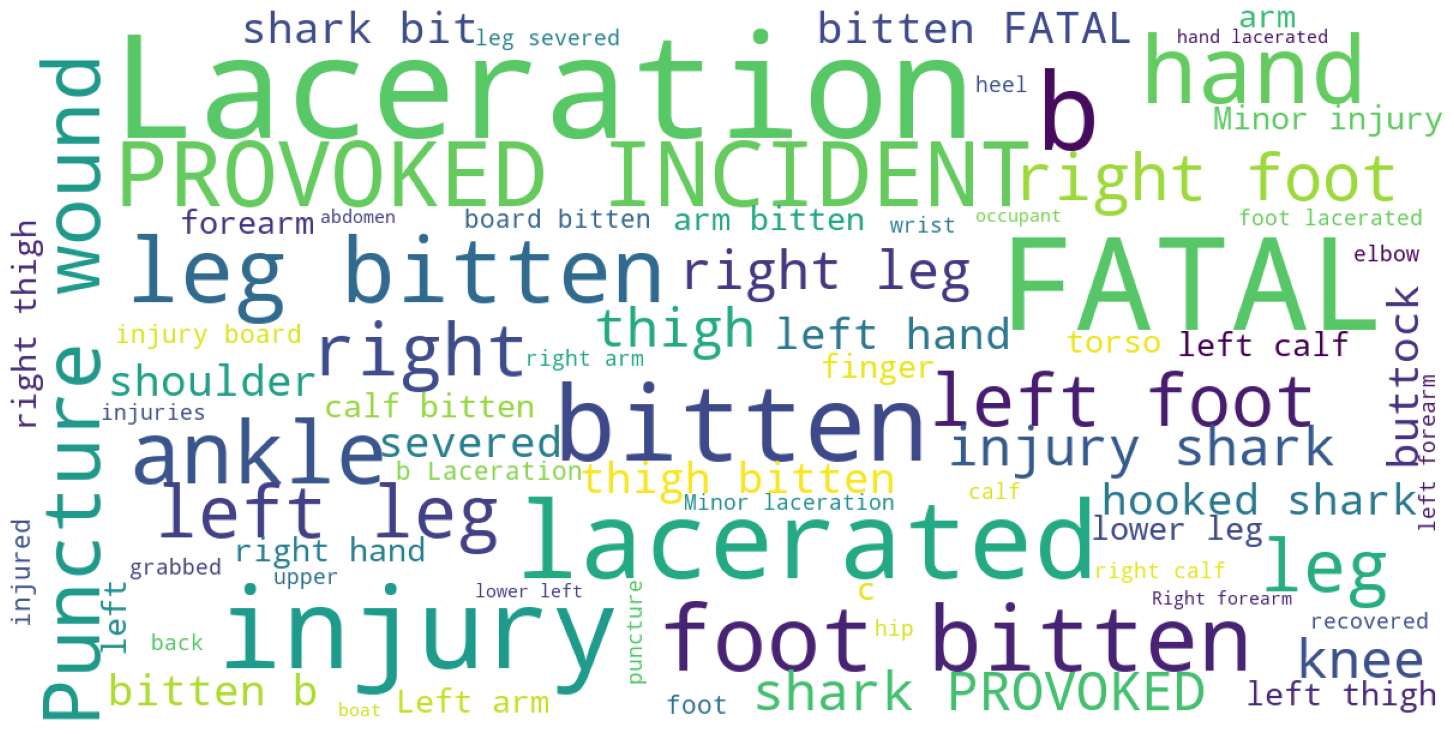

In [16]:
wordcloud = WordCloud(background_color = 'white',
                      max_words = 200, max_font_size = 40, scale = 3, 
                      random_state = 42).generate(str(df2['Injury']))
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

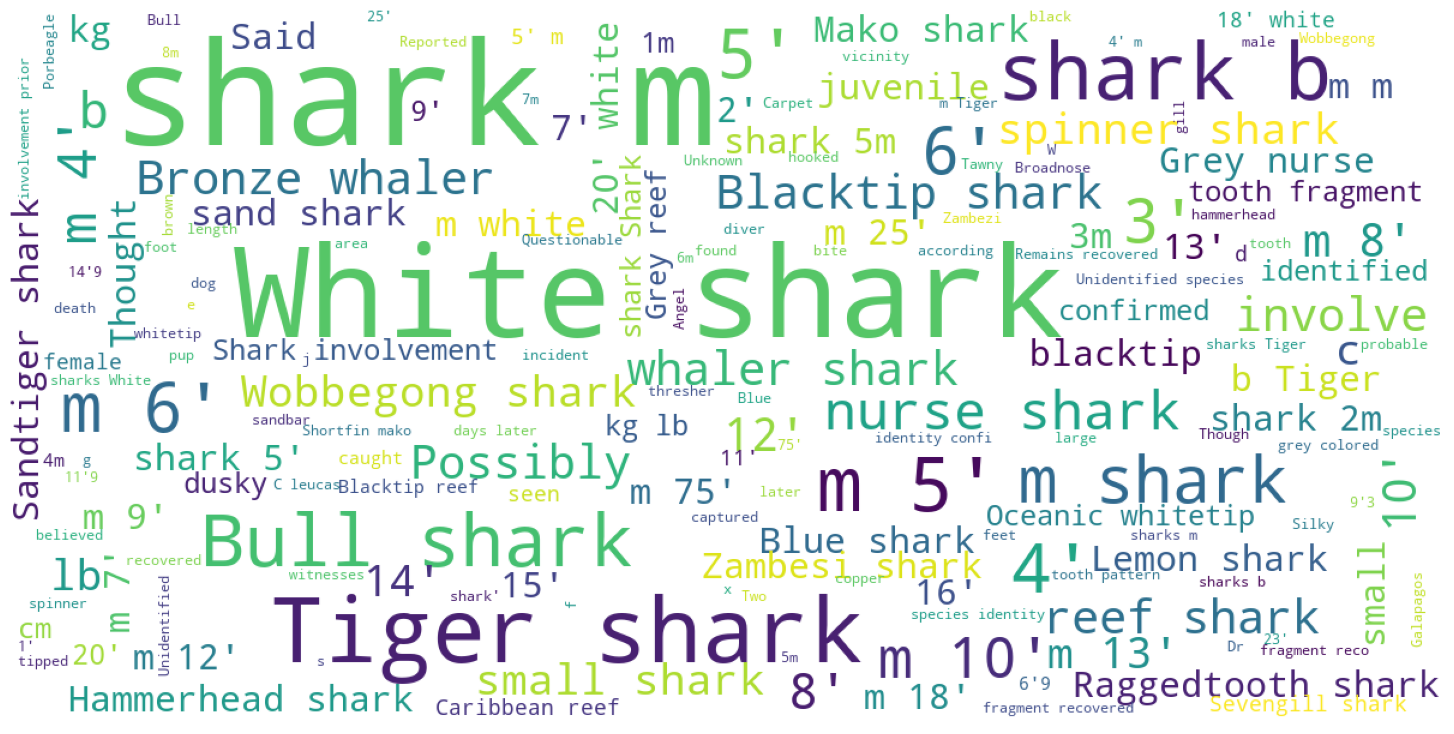

In [17]:
wordcloud = WordCloud(background_color = 'white',
                      max_words = 200, max_font_size = 40, scale = 3, 
                      random_state = 42).generate(str(df2['Species ']))
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [18]:
df2['Country'].value_counts()

USA                               1051
AUSTRALIA                          585
SOUTH AFRICA                       306
NEW ZEALAND                         54
BAHAMAS                             42
PAPUA NEW GUINEA                    33
BRAZIL                              28
ITALY                               27
MEXICO                              19
REUNION                             18
EGYPT                               16
SPAIN                               14
MOZAMBIQUE                          13
FRENCH POLYNESIA                    13
NEW CALEDONIA                       12
CROATIA                             11
FIJI                                10
CUBA                                 9
ENGLAND                              9
PANAMA                               7
JAPAN                                6
TONGA                                6
UNITED KINGDOM                       6
COSTA RICA                           5
SENEGAL                              5
INDONESIA                

In [19]:
# Create country keys
key = []
for country in df2['Country']:
    if "USA" in country:
        key.append('USA')
    elif "AUSTRALIA" in country:
        key.append('AUS')
    elif "SOUTH AFRICA" in country:
        key.append('SAfrica')    
    elif "NEW ZEALAND" in country:
        key.append('NewZeal') 
    elif "BAHAMAS" in country:
        key.append('BHMS')
    elif "PAPUA NEW GUINEA" in country:
        key.append('PNG')
    elif "BRAZIL" in country:
        key.append('BZL')
    elif "ITALY" in country:
        key.append('Italy') 
    elif "MEXICO" in country:
        key.append('MEX')
    elif "REUNION" in country:
        key.append('Reuinon') 
    elif "EGYPT" in country:
        key.append('EGYT')
    elif "SPAIN" in country:
        key.append('SPN')
    else:
        key.append('Other')

In [20]:
df2['countryKey'] = key

In [21]:
df2 = df2.drop(['Country'], axis = 1)

In [22]:
df2.head(10)

Year          Type               Area  \
Case Number                                             
2018.06.25    2018.0       Boating         California   
2018.06.08    2018.0    Unprovoked    New South Wales   
2018.06.04    2018.0      Provoked             Colima   
2018.06.03.a  2018.0    Unprovoked         Pernambuco   
2018.05.27    2018.0    Unprovoked            Florida   
2018.05.26.b  2018.0    Unprovoked            Florida   
2018.05.24    2018.0      Provoked         Queensland   
2018.05.13.a  2018.0       Invalid           Cornwall   
2018.05.00    2018.0      Provoked  Westerm Australia   
2018.05.09    2018.0  Questionable    New South Wales   

                                                       Location  \
Case Number                                                       
2018.06.25                          Oceanside, San Diego County   
2018.06.08                                   Arrawarra Headland   
2018.06.04                                             La Ticla   
2018.06.03.a                              Piedade Beach, Recife   
2018.05.27    Lighhouse Point Park, Ponce Inlet, Volusia County   
2018.05.26.b                       Cocoa Beach, Brevard  County   
2018.05.24                                      Cairns Aquarium   
2018.05.13.a                                     Off Land's End   
2018.05.00                                           Dugong Bay   
2018.05.09                               Sharpes Beach, Ballina   

                    Activity Sex   \
Case Number                         
2018.06.25          Paddling    F   
2018.06.08           Surfing    M   
2018.06.04       Free diving    M   
2018.06.03.a        Swimming    M   
2018.05.27           Fishing    M   
2018.05.26.b         Walking    M   
2018.05.24    Feeding sharks    M   
2018.05.13.a         Fishing    M   
2018.05.00    Feeding sharks    F   
2018.05.09           Surfing    M   

                                                         Injury Fatal (Y/N)  \
Case Number                                                                   
2018.06.25    No injury to occupant, outrigger canoe and pad...           N   
2018.06.08                            Minor injury to lower leg           N   
2018.06.04    Lacerations to leg & hand shark PROVOKED INCIDENT           N   
2018.06.03.a                                              FATAL           Y   
2018.05.27              Minor injury to foot. PROVOKED INCIDENT           N   
2018.05.26.b                              Lower left leg bitten           N   
2018.05.24    Minor bite to hand by captive shark. PROVOKED ...           N   
2018.05.13.a  Injured by teeth of a dead porbeagle shark he ...           N   
2018.05.00      Shallow lacerations to finger PROVOKED INCIDENT           N   
2018.05.09                         No injury, surfboard damaged           N   

                                     Species  countryKey  
Case Number                                               
2018.06.25                        White shark        USA  
2018.06.08                          2 m shark        AUS  
2018.06.04                    Tiger shark, 3m        MEX  
2018.06.03.a                      Tiger shark        BZL  
2018.05.27                    Lemon shark, 3'        USA  
2018.05.26.b                   Bull shark, 6'        USA  
2018.05.24                    Grey reef shark        AUS  
2018.05.13.a                 Invalid incident      Other  
2018.05.00              Tawny nurse shark, 2m        AUS  
2018.05.09    Shark involvement not confirmed        AUS

In [23]:
specKey = []
for spec in df2['Species ']:
    spec = spec.lower()
    if "zambesi" in spec:
        specKey.append('bull')
    elif "zambezi" in spec:
        specKey.append('bull')
    elif "wobbegong" in spec:
        specKey.append('wobbegong')
    elif "white" in spec:
        specKey.append('white')
    elif "whale" in spec:
        specKey.append('whale')
    elif "whaler" in spec:
        specKey.append('whale')
    elif "reef" in spec:
        specKey.append('reef')
    elif "tiger" in spec:
        specKey.append('tiger')
    elif "raggedtooth" in spec:
        specKey.append('raggedtooth')
    elif "nurse" in spec:
        specKey.append('nurse')
    elif "mako" in spec:
        specKey.append('mako')
    elif "lemon" in spec:
        specKey.append('lemon')
    elif "hammer" in spec:
        specKey.append('hammerhead')
    elif "hammerhead" in spec:
        specKey.append('hammerhead')
    elif "bull" in spec:
        specKey.append('bull')
    elif "blue" in spec:
        specKey.append('blue')
    elif "blacktip" in spec:
        specKey.append('blacktip')
    else: specKey.append('other')

In [24]:
df2['Spec'] = specKey

In [25]:
df2 = df2.drop(['Species '], axis = 1)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2459 entries, 2018.06.25 to 1812.07.00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2459 non-null   float64
 1   Type         2459 non-null   object 
 2   Area         2459 non-null   object 
 3   Location     2459 non-null   object 
 4   Activity     2459 non-null   object 
 5   Sex          2459 non-null   object 
 6   Injury       2459 non-null   object 
 7   Fatal (Y/N)  2459 non-null   object 
 8   countryKey   2459 non-null   object 
 9   Spec         2459 non-null   object 
dtypes: float64(1), object(9)
memory usage: 211.3+ KB


In [27]:
activKey = []
for activ in df2['Activity']:
    activ = activ.lower()
    if "adrift" in activ:
        activKey.append('adrift')
    elif "bathing" in activ:
        activKey.append('bathing')
    elif "fishing" in activ:
        activKey.append('fishing')    
    elif "floating" in activ:
        activKey.append('floating')
    elif "free diving" in activ:
        activKey.append('freedive')
    elif "scuba diving" in activ:
        activKey.append('scuba')
    elif "spearfishing" in activ:
        activKey.append('spearfishing')
    elif "swimming" in activ:
        activKey.append('swimming')
    else: activKey.append('other')

In [28]:
df2['activityKey'] = activKey

In [29]:
df2 = df2.drop(['Activity'], axis = 1)

In [30]:
df2.head()

Year        Type             Area  \
Case Number                                         
2018.06.25    2018.0     Boating       California   
2018.06.08    2018.0  Unprovoked  New South Wales   
2018.06.04    2018.0    Provoked           Colima   
2018.06.03.a  2018.0  Unprovoked       Pernambuco   
2018.05.27    2018.0  Unprovoked          Florida   

                                                       Location Sex   \
Case Number                                                            
2018.06.25                          Oceanside, San Diego County    F   
2018.06.08                                   Arrawarra Headland    M   
2018.06.04                                             La Ticla    M   
2018.06.03.a                              Piedade Beach, Recife    M   
2018.05.27    Lighhouse Point Park, Ponce Inlet, Volusia County    M   

                                                         Injury Fatal (Y/N)  \
Case Number                                                                   
2018.06.25    No injury to occupant, outrigger canoe and pad...           N   
2018.06.08                            Minor injury to lower leg           N   
2018.06.04    Lacerations to leg & hand shark PROVOKED INCIDENT           N   
2018.06.03.a                                              FATAL           Y   
2018.05.27              Minor injury to foot. PROVOKED INCIDENT           N   

             countryKey   Spec activityKey  
Case Number                                 
2018.06.25          USA  white       other  
2018.06.08          AUS  other       other  
2018.06.04          MEX  tiger    freedive  
2018.06.03.a        BZL  tiger    swimming  
2018.05.27          USA  lemon     fishing

In [31]:
df2 = df2.drop(['Area', 'Location', 'Injury'], axis = 1)

In [32]:
df2.head()

Year        Type Sex  Fatal (Y/N) countryKey   Spec  \
Case Number                                                           
2018.06.25    2018.0     Boating    F           N        USA  white   
2018.06.08    2018.0  Unprovoked    M           N        AUS  other   
2018.06.04    2018.0    Provoked    M           N        MEX  tiger   
2018.06.03.a  2018.0  Unprovoked    M           Y        BZL  tiger   
2018.05.27    2018.0  Unprovoked    M           N        USA  lemon   

             activityKey  
Case Number               
2018.06.25         other  
2018.06.08         other  
2018.06.04      freedive  
2018.06.03.a    swimming  
2018.05.27       fishing

In [33]:
df2.reset_index(drop = True)

Year          Type Sex  Fatal (Y/N) countryKey         Spec  \
0     2018.0       Boating    F           N        USA        white   
1     2018.0    Unprovoked    M           N        AUS        other   
2     2018.0      Provoked    M           N        MEX        tiger   
3     2018.0    Unprovoked    M           Y        BZL        tiger   
4     2018.0    Unprovoked    M           N        USA        lemon   
5     2018.0    Unprovoked    M           N        USA         bull   
6     2018.0      Provoked    M           N        AUS         reef   
7     2018.0       Invalid    M           N      Other        other   
8     2018.0      Provoked    F           N        AUS        nurse   
9     2018.0  Questionable    M           N        AUS        other   
10    2018.0    Unprovoked    M           N      Other        tiger   
11    2018.0  Questionable    M           N        AUS        other   
12    2018.0    Unprovoked    M           N        AUS        other   
13    2018.0    Unprovoked    M           N        AUS        white   
14    2018.0    Unprovoked    M           N      Other        tiger   
15    2018.0    Unprovoked    M           N    SAfrica        white   
16    2018.0    Unprovoked    M           N        USA        other   
17    2018.0    Unprovoked    M           N      Other         bull   
18    2018.0    Unprovoked    M           N       BHMS        tiger   
19    2018.0       Invalid    M           N        BZL        other   
20    2018.0    Unprovoked    M           N    SAfrica        white   
21    2018.0    Unprovoked    M           N        USA        tiger   
22    2018.0    Unprovoked    M           N        AUS    wobbegong   
23    2018.0    Unprovoked    M           N        AUS        other   
24    2018.0    Unprovoked    M           N        AUS        other   
25    2018.0    Unprovoked    M           N    SAfrica     blacktip   
26    2018.0    Unprovoked    F           N        AUS        white   
27    2018.0    Unprovoked    M           N        AUS         bull   
28    2018.0       Invalid    F           N        AUS    wobbegong   
29    2018.0       Invalid    F           N        BZL        other   
30    2018.0    Unprovoked    M           N      Other        other   
31    2018.0       Invalid    M           N        AUS        other   
32    2018.0    Unprovoked    M           N        AUS         reef   
33    2018.0    Unprovoked    M           N        AUS        white   
34    2018.0    Unprovoked    M           N        BZL        other   
35    2018.0    Unprovoked    M           N        AUS    wobbegong   
36    2017.0    Unprovoked    F           N        USA        tiger   
37    2017.0      Provoked    M           N      Other        nurse   
38    2017.0    Unprovoked    M           N      Other        tiger   
39    2017.0    Unprovoked    F           Y      Other        tiger   
40    2017.0    Unprovoked    M           N        USA        white   
41    2017.0    Unprovoked    M           N        AUS        other   
42    2017.0    Unprovoked    M           Y      Other        tiger   
43    2017.0    Unprovoked    M           N        AUS        other   
44    2017.0    Unprovoked    M           N        AUS    wobbegong   
45    2017.0    Unprovoked    F           N        AUS        white   
46    2017.0    Unprovoked    M           N    NewZeal        other   
47    2017.0    Unprovoked    M           N        USA        other   
48    2017.0    Unprovoked    M           N        USA        tiger   
49    2017.0    Unprovoked    F           N        USA        other   
50    2017.0    Unprovoked    M           N        USA        other   
51    2017.0    Unprovoked    M           N        AUS        white   
52    2017.0    Unprovoked    M           N        USA        other   
53    2017.0    Unprovoked    M           N        SPN        other   
54    2017.0    Unprovoked    M           N        USA        other   
55    2017.0    Unprovoked    M 

In [34]:
df2['Fatal (Y/N)'].value_counts()

N          2095
Y           351
UNKNOWN       8
 N            3
2017          1
M             1
Name: Fatal (Y/N), dtype: int64

In [35]:
tempTick = []
for result in df2['Fatal (Y/N)']:
    if result == 'Y' or result == 'N':
        tempTick.append(1)
    else:
        tempTick.append(0)

In [36]:
df2['tempTick'] = tempTick

In [37]:
df3 = df2.loc[df2['tempTick'] == 1]

In [38]:
df3['Fatal (Y/N)'].value_counts()

N    2095
Y     351
Name: Fatal (Y/N), dtype: int64

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2446 entries, 2018.06.25 to 1812.07.00
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2446 non-null   float64
 1   Type         2446 non-null   object 
 2   Sex          2446 non-null   object 
 3   Fatal (Y/N)  2446 non-null   object 
 4   countryKey   2446 non-null   object 
 5   Spec         2446 non-null   object 
 6   activityKey  2446 non-null   object 
 7   tempTick     2446 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 172.0+ KB


In [40]:
df3 = df3.drop(['tempTick'], axis = 1)

In [41]:
df3.head()

Year        Type Sex  Fatal (Y/N) countryKey   Spec  \
Case Number                                                           
2018.06.25    2018.0     Boating    F           N        USA  white   
2018.06.08    2018.0  Unprovoked    M           N        AUS  other   
2018.06.04    2018.0    Provoked    M           N        MEX  tiger   
2018.06.03.a  2018.0  Unprovoked    M           Y        BZL  tiger   
2018.05.27    2018.0  Unprovoked    M           N        USA  lemon   

             activityKey  
Case Number               
2018.06.25         other  
2018.06.08         other  
2018.06.04      freedive  
2018.06.03.a    swimming  
2018.05.27       fishing

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2446 entries, 2018.06.25 to 1812.07.00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2446 non-null   float64
 1   Type         2446 non-null   object 
 2   Sex          2446 non-null   object 
 3   Fatal (Y/N)  2446 non-null   object 
 4   countryKey   2446 non-null   object 
 5   Spec         2446 non-null   object 
 6   activityKey  2446 non-null   object 
dtypes: float64(1), object(6)
memory usage: 152.9+ KB


In [43]:
df3.reset_index(drop = True)

Year          Type Sex  Fatal (Y/N) countryKey         Spec  \
0     2018.0       Boating    F           N        USA        white   
1     2018.0    Unprovoked    M           N        AUS        other   
2     2018.0      Provoked    M           N        MEX        tiger   
3     2018.0    Unprovoked    M           Y        BZL        tiger   
4     2018.0    Unprovoked    M           N        USA        lemon   
5     2018.0    Unprovoked    M           N        USA         bull   
6     2018.0      Provoked    M           N        AUS         reef   
7     2018.0       Invalid    M           N      Other        other   
8     2018.0      Provoked    F           N        AUS        nurse   
9     2018.0  Questionable    M           N        AUS        other   
10    2018.0    Unprovoked    M           N      Other        tiger   
11    2018.0  Questionable    M           N        AUS        other   
12    2018.0    Unprovoked    M           N        AUS        other   
13    2018.0    Unprovoked    M           N        AUS        white   
14    2018.0    Unprovoked    M           N      Other        tiger   
15    2018.0    Unprovoked    M           N    SAfrica        white   
16    2018.0    Unprovoked    M           N        USA        other   
17    2018.0    Unprovoked    M           N      Other         bull   
18    2018.0    Unprovoked    M           N       BHMS        tiger   
19    2018.0       Invalid    M           N        BZL        other   
20    2018.0    Unprovoked    M           N    SAfrica        white   
21    2018.0    Unprovoked    M           N        USA        tiger   
22    2018.0    Unprovoked    M           N        AUS    wobbegong   
23    2018.0    Unprovoked    M           N        AUS        other   
24    2018.0    Unprovoked    M           N        AUS        other   
25    2018.0    Unprovoked    M           N    SAfrica     blacktip   
26    2018.0    Unprovoked    F           N        AUS        white   
27    2018.0    Unprovoked    M           N        AUS         bull   
28    2018.0       Invalid    F           N        AUS    wobbegong   
29    2018.0       Invalid    F           N        BZL        other   
30    2018.0    Unprovoked    M           N      Other        other   
31    2018.0       Invalid    M           N        AUS        other   
32    2018.0    Unprovoked    M           N        AUS         reef   
33    2018.0    Unprovoked    M           N        AUS        white   
34    2018.0    Unprovoked    M           N        BZL        other   
35    2018.0    Unprovoked    M           N        AUS    wobbegong   
36    2017.0    Unprovoked    F           N        USA        tiger   
37    2017.0      Provoked    M           N      Other        nurse   
38    2017.0    Unprovoked    M           N      Other        tiger   
39    2017.0    Unprovoked    F           Y      Other        tiger   
40    2017.0    Unprovoked    M           N        USA        white   
41    2017.0    Unprovoked    M           N        AUS        other   
42    2017.0    Unprovoked    M           Y      Other        tiger   
43    2017.0    Unprovoked    M           N        AUS        other   
44    2017.0    Unprovoked    M           N        AUS    wobbegong   
45    2017.0    Unprovoked    F           N        AUS        white   
46    2017.0    Unprovoked    M           N    NewZeal        other   
47    2017.0    Unprovoked    M           N        USA        other   
48    2017.0    Unprovoked    M           N        USA        tiger   
49    2017.0    Unprovoked    F           N        USA        other   
50    2017.0    Unprovoked    M           N        USA        other   
51    2017.0    Unprovoked    M           N        AUS        white   
52    2017.0    Unprovoked    M           N        USA        other   
53    2017.0    Unprovoked    M           N        SPN        other   
54    2017.0    Unprovoked    M           N        USA        other   
55    2017.0    Unprovoked    M 

In [44]:
df3['Sex '] = lc.fit_transform(df3['Sex '])

In [45]:
# female = 1; male = 2
df3.head()

Year        Type  Sex  Fatal (Y/N) countryKey   Spec  \
Case Number                                                            
2018.06.25    2018.0     Boating     1           N        USA  white   
2018.06.08    2018.0  Unprovoked     2           N        AUS  other   
2018.06.04    2018.0    Provoked     2           N        MEX  tiger   
2018.06.03.a  2018.0  Unprovoked     2           Y        BZL  tiger   
2018.05.27    2018.0  Unprovoked     2           N        USA  lemon   

             activityKey  
Case Number               
2018.06.25         other  
2018.06.08         other  
2018.06.04      freedive  
2018.06.03.a    swimming  
2018.05.27       fishing

In [46]:
df3.reset_index(drop = True)

Year          Type  Sex  Fatal (Y/N) countryKey         Spec  \
0     2018.0       Boating     1           N        USA        white   
1     2018.0    Unprovoked     2           N        AUS        other   
2     2018.0      Provoked     2           N        MEX        tiger   
3     2018.0    Unprovoked     2           Y        BZL        tiger   
4     2018.0    Unprovoked     2           N        USA        lemon   
5     2018.0    Unprovoked     2           N        USA         bull   
6     2018.0      Provoked     2           N        AUS         reef   
7     2018.0       Invalid     2           N      Other        other   
8     2018.0      Provoked     1           N        AUS        nurse   
9     2018.0  Questionable     2           N        AUS        other   
10    2018.0    Unprovoked     2           N      Other        tiger   
11    2018.0  Questionable     2           N        AUS        other   
12    2018.0    Unprovoked     2           N        AUS        other   
13    2018.0    Unprovoked     2           N        AUS        white   
14    2018.0    Unprovoked     2           N      Other        tiger   
15    2018.0    Unprovoked     2           N    SAfrica        white   
16    2018.0    Unprovoked     2           N        USA        other   
17    2018.0    Unprovoked     2           N      Other         bull   
18    2018.0    Unprovoked     2           N       BHMS        tiger   
19    2018.0       Invalid     2           N        BZL        other   
20    2018.0    Unprovoked     2           N    SAfrica        white   
21    2018.0    Unprovoked     2           N        USA        tiger   
22    2018.0    Unprovoked     2           N        AUS    wobbegong   
23    2018.0    Unprovoked     2           N        AUS        other   
24    2018.0    Unprovoked     2           N        AUS        other   
25    2018.0    Unprovoked     2           N    SAfrica     blacktip   
26    2018.0    Unprovoked     1           N        AUS        white   
27    2018.0    Unprovoked     2           N        AUS         bull   
28    2018.0       Invalid     1           N        AUS    wobbegong   
29    2018.0       Invalid     1           N        BZL        other   
30    2018.0    Unprovoked     2           N      Other        other   
31    2018.0       Invalid     2           N        AUS        other   
32    2018.0    Unprovoked     2           N        AUS         reef   
33    2018.0    Unprovoked     2           N        AUS        white   
34    2018.0    Unprovoked     2           N        BZL        other   
35    2018.0    Unprovoked     2           N        AUS    wobbegong   
36    2017.0    Unprovoked     1           N        USA        tiger   
37    2017.0      Provoked     2           N      Other        nurse   
38    2017.0    Unprovoked     2           N      Other        tiger   
39    2017.0    Unprovoked     1           Y      Other        tiger   
40    2017.0    Unprovoked     2           N        USA        white   
41    2017.0    Unprovoked     2           N        AUS        other   
42    2017.0    Unprovoked     2           Y      Other        tiger   
43    2017.0    Unprovoked     2           N        AUS        other   
44    2017.0    Unprovoked     2           N        AUS    wobbegong   
45    2017.0    Unprovoked     1           N        AUS        white   
46    2017.0    Unprovoked     2           N    NewZeal        other   
47    2017.0    Unprovoked     2           N        USA        other   
48    2017.0    Unprovoked     2           N        USA        tiger   
49    2017.0    Unprovoked     1           N        USA        other   
50    2017.0    Unprovoked     2           N        USA        other   
51    2017.0    Unprovoked     2           N        AUS        white   
52    2017.0    Unprovoked     2           N        USA        other   
53    2017.0    Unprovoked     2           N        SPN        other   
54    2017.0    Unprovoked     2           N    

In [47]:
df3['Sex '].value_counts()

2    2148
1     294
5       1
3       1
4       1
0       1
Name: Sex , dtype: int64

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2446 entries, 2018.06.25 to 1812.07.00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2446 non-null   float64
 1   Type         2446 non-null   object 
 2   Sex          2446 non-null   int32  
 3   Fatal (Y/N)  2446 non-null   object 
 4   countryKey   2446 non-null   object 
 5   Spec         2446 non-null   object 
 6   activityKey  2446 non-null   object 
dtypes: float64(1), int32(1), object(5)
memory usage: 143.3+ KB


In [49]:
df3 = df3.loc[df3['Sex '] < 3]

In [50]:
df3['Sex '].value_counts()

2    2148
1     294
0       1
Name: Sex , dtype: int64

In [51]:
df3 = df3.loc[df3['Sex '] != 0]

In [52]:
df3['Sex '].value_counts()

2    2148
1     294
Name: Sex , dtype: int64

In [53]:
# female = 0; male = 1
genTick = []
for x in df3['Sex ']:
    genTick.append(x-1)

In [54]:
df3['gender'] = genTick

In [55]:
df3 = df3.drop(['Sex '], axis = 1)

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2442 non-null   float64
 1   Type         2442 non-null   object 
 2   Fatal (Y/N)  2442 non-null   object 
 3   countryKey   2442 non-null   object 
 4   Spec         2442 non-null   object 
 5   activityKey  2442 non-null   object 
 6   gender       2442 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 152.6+ KB


In [57]:
# 0 = No; 1 = Yes
df3['Fatal (Y/N)'] = lc.fit_transform(df3['Fatal (Y/N)'])

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2442 non-null   float64
 1   Type         2442 non-null   object 
 2   Fatal (Y/N)  2442 non-null   int32  
 3   countryKey   2442 non-null   object 
 4   Spec         2442 non-null   object 
 5   activityKey  2442 non-null   object 
 6   gender       2442 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 143.1+ KB


In [59]:
activityCount = df3

In [60]:
activityCount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2442 non-null   float64
 1   Type         2442 non-null   object 
 2   Fatal (Y/N)  2442 non-null   int32  
 3   countryKey   2442 non-null   object 
 4   Spec         2442 non-null   object 
 5   activityKey  2442 non-null   object 
 6   gender       2442 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 143.1+ KB


In [61]:
# Get the dummy variables
dummies = pd.get_dummies(activityCount[['activityKey']], drop_first = False)

# Drop the column for which we created the dummy variable
activityCount = activityCount.drop(['activityKey'], axis = 1)

dummies.columns.values

array(['activityKey_adrift', 'activityKey_bathing', 'activityKey_fishing',
       'activityKey_floating', 'activityKey_freedive',
       'activityKey_other', 'activityKey_scuba', 'activityKey_swimming'],
      dtype=object)

In [62]:
activityCount = pd.concat([activityCount, dummies[['activityKey_adrift', 'activityKey_bathing', 'activityKey_fishing',
       'activityKey_floating', 'activityKey_freedive',
       'activityKey_scuba', 'activityKey_swimming']]], axis = 1)

In [63]:
activityCount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2442 non-null   float64
 1   Type                  2442 non-null   object 
 2   Fatal (Y/N)           2442 non-null   int32  
 3   countryKey            2442 non-null   object 
 4   Spec                  2442 non-null   object 
 5   gender                2442 non-null   int64  
 6   activityKey_adrift    2442 non-null   uint8  
 7   activityKey_bathing   2442 non-null   uint8  
 8   activityKey_fishing   2442 non-null   uint8  
 9   activityKey_floating  2442 non-null   uint8  
 10  activityKey_freedive  2442 non-null   uint8  
 11  activityKey_scuba     2442 non-null   uint8  
 12  activityKey_swimming  2442 non-null   uint8  
dtypes: float64(1), int32(1), int64(1), object(3), uint8(7)
memory usage: 140.7+ KB


In [64]:
activityCount = activityCount.drop(['Year', 'Type', 'Fatal (Y/N)', 'Spec', 
                                    'gender'], axis = 1)

In [66]:
sums2 = activityCount.groupby('countryKey').sum().transpose()
sums2

countryKey            AUS  BHMS  BZL  EGYT  Italy  MEX  NewZeal  Other  PNG  \
activityKey_adrift      1     0    0     0      0    0        0      0    0   
activityKey_bathing    17     1    1     0      0    0        3      4    1   
activityKey_fishing   126    22    3     1     13    4       20     79   18   
activityKey_floating    2     0    0     0      0    1        1      1    0   
activityKey_freedive   10     0    0     1      0    1        0      6    0   
activityKey_scuba      23     1    1     3      2    1        2     13    1   
activityKey_swimming   75     1    9     3      1    4        9     72    6   

countryKey            Reuinon  SAfrica  SPN  USA  
activityKey_adrift          0        0    0    3  
activityKey_bathing         0        0    0    2  
activityKey_fishing         2       70    1  177  
activityKey_floating        0        2    0   14  
activityKey_freedive        0        7    0   18  
activityKey_scuba           0        7    0   24  
activityKey_swimming        2       46    7  156

In [67]:
sharkCountry = df3

In [68]:
sharkCountry.head()

Year        Type  Fatal (Y/N) countryKey   Spec activityKey  \
Case Number                                                                   
2018.06.25    2018.0     Boating            0        USA  white       other   
2018.06.08    2018.0  Unprovoked            0        AUS  other       other   
2018.06.04    2018.0    Provoked            0        MEX  tiger    freedive   
2018.06.03.a  2018.0  Unprovoked            1        BZL  tiger    swimming   
2018.05.27    2018.0  Unprovoked            0        USA  lemon     fishing   

              gender  
Case Number           
2018.06.25         0  
2018.06.08         1  
2018.06.04         1  
2018.06.03.a       1  
2018.05.27         1

In [69]:
sharkCountry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2442 non-null   float64
 1   Type         2442 non-null   object 
 2   Fatal (Y/N)  2442 non-null   int32  
 3   countryKey   2442 non-null   object 
 4   Spec         2442 non-null   object 
 5   activityKey  2442 non-null   object 
 6   gender       2442 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 143.1+ KB


In [70]:
# Get the dummy variables
dummies = pd.get_dummies(sharkCountry[['Spec']], drop_first = False)

# Drop the column for which we created the dummy variable
sharkCountry = sharkCountry.drop(['Spec'], axis = 1)

dummies.columns.values

array(['Spec_blacktip', 'Spec_blue', 'Spec_bull', 'Spec_hammerhead',
       'Spec_lemon', 'Spec_mako', 'Spec_nurse', 'Spec_other',
       'Spec_raggedtooth', 'Spec_reef', 'Spec_tiger', 'Spec_whale',
       'Spec_white', 'Spec_wobbegong'], dtype=object)

In [71]:
sharkCountry = pd.concat([sharkCountry, dummies[['Spec_blacktip', 'Spec_blue', 'Spec_bull', 'Spec_hammerhead',
       'Spec_lemon', 'Spec_mako', 'Spec_nurse',
       'Spec_raggedtooth', 'Spec_reef', 'Spec_tiger', 'Spec_whale',
       'Spec_white', 'Spec_wobbegong']]], axis = 1)

In [72]:
sharkCountry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              2442 non-null   float64
 1   Type              2442 non-null   object 
 2   Fatal (Y/N)       2442 non-null   int32  
 3   countryKey        2442 non-null   object 
 4   activityKey       2442 non-null   object 
 5   gender            2442 non-null   int64  
 6   Spec_blacktip     2442 non-null   uint8  
 7   Spec_blue         2442 non-null   uint8  
 8   Spec_bull         2442 non-null   uint8  
 9   Spec_hammerhead   2442 non-null   uint8  
 10  Spec_lemon        2442 non-null   uint8  
 11  Spec_mako         2442 non-null   uint8  
 12  Spec_nurse        2442 non-null   uint8  
 13  Spec_raggedtooth  2442 non-null   uint8  
 14  Spec_reef         2442 non-null   uint8  
 15  Spec_tiger        2442 non-null   uint8  
 16  Spec_whale        2442 non-null 

In [73]:
sharkCountry = sharkCountry.drop(['Year', 'Type', 'Fatal (Y/N)', 'activityKey', 
                                  'gender'], axis = 1)

In [74]:
sharkCountry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   countryKey        2442 non-null   object
 1   Spec_blacktip     2442 non-null   uint8 
 2   Spec_blue         2442 non-null   uint8 
 3   Spec_bull         2442 non-null   uint8 
 4   Spec_hammerhead   2442 non-null   uint8 
 5   Spec_lemon        2442 non-null   uint8 
 6   Spec_mako         2442 non-null   uint8 
 7   Spec_nurse        2442 non-null   uint8 
 8   Spec_raggedtooth  2442 non-null   uint8 
 9   Spec_reef         2442 non-null   uint8 
 10  Spec_tiger        2442 non-null   uint8 
 11  Spec_whale        2442 non-null   uint8 
 12  Spec_white        2442 non-null   uint8 
 13  Spec_wobbegong    2442 non-null   uint8 
dtypes: object(1), uint8(13)
memory usage: 69.2+ KB


In [127]:
sums = sharkCountry.groupby('countryKey').sum().transpose()
sums

countryKey        AUS  BHMS  BZL  EGYT  Italy  MEX  NewZeal  Other  PNG  \
Spec_blacktip       1     1    0     0      0    0        0      6    0   
Spec_blue           7     0    0     0      1    0        1      6    0   
Spec_bull          25     9    4     0      0    2        0     27    0   
Spec_hammerhead     6     0    1     0      0    1        0      1    0   
Spec_lemon          1     4    1     0      0    0        0      4    0   
Spec_mako           4     1    0     3      0    0        5      6    0   
Spec_nurse         36     2    0     0      0    0        0      3    0   
Spec_raggedtooth    1     0    0     0      0    0        0      0    0   
Spec_reef          10     9    0     0      0    0        1     19    0   
Spec_tiger         48     4   10     0      0    7        1     33    5   
Spec_whale         56     0    0     0      0    0        7      1    2   
Spec_white        126     1    3    13     19    2       13     36    1   
Spec_wobbegong     43     0    0     0      0    0        0      0    1   

countryKey        Reuinon  SAfrica  SPN  USA  
Spec_blacktip           0        8    0   63  
Spec_blue               0        3    4   12  
Spec_bull               7       20    0   66  
Spec_hammerhead         0        3    0   26  
Spec_lemon              1        0    0   17  
Spec_mako               0        3    0   12  
Spec_nurse              0        0    0   35  
Spec_raggedtooth        0       40    0    0  
Spec_reef               0        0    0   14  
Spec_tiger              6       11    0  111  
Spec_whale              0        0    0    0  
Spec_white              1      140    2  191  
Spec_wobbegong          0        0    0    0

In [76]:
# Get the dummy variables
dummies = pd.get_dummies(df3[['Type']], drop_first = False)

# Drop the column for which we created the dummy variable
df3 = df3.drop(['Type'], axis = 1)

dummies.columns.values

array(['Type_Boat', 'Type_Boating', 'Type_Invalid', 'Type_Provoked',
       'Type_Questionable', 'Type_Sea Disaster', 'Type_Unprovoked'],
      dtype=object)

In [77]:
df3 = pd.concat([df3, dummies[['Type_Boat', 'Type_Boating', 'Type_Invalid', 'Type_Provoked',
       'Type_Questionable', 'Type_Sea Disaster', 'Type_Unprovoked']]], axis = 1)

In [78]:
# Get the dummy variables
dummies = pd.get_dummies(df3[['countryKey']], drop_first = False)

# Drop the column for which we created the dummy variable
df3 = df3.drop(['countryKey'], axis = 1)

dummies.columns.values

array(['countryKey_AUS', 'countryKey_BHMS', 'countryKey_BZL',
       'countryKey_EGYT', 'countryKey_Italy', 'countryKey_MEX',
       'countryKey_NewZeal', 'countryKey_Other', 'countryKey_PNG',
       'countryKey_Reuinon', 'countryKey_SAfrica', 'countryKey_SPN',
       'countryKey_USA'], dtype=object)

In [79]:
df3 = pd.concat([df3, dummies[['countryKey_AUS', 'countryKey_BHMS', 'countryKey_BZL',
       'countryKey_EGYT', 'countryKey_Italy', 'countryKey_MEX',
       'countryKey_NewZeal', 'countryKey_Other', 'countryKey_PNG',
       'countryKey_Reuinon', 'countryKey_SAfrica', 'countryKey_SPN',
       'countryKey_USA']]], axis = 1)

In [80]:
# Get the dummy variables
dummies = pd.get_dummies(df3[['Spec']], drop_first = False)

# Drop the column for which we created the dummy variable
df3 = df3.drop(['Spec'], axis = 1)

dummies.columns.values

array(['Spec_blacktip', 'Spec_blue', 'Spec_bull', 'Spec_hammerhead',
       'Spec_lemon', 'Spec_mako', 'Spec_nurse', 'Spec_other',
       'Spec_raggedtooth', 'Spec_reef', 'Spec_tiger', 'Spec_whale',
       'Spec_white', 'Spec_wobbegong'], dtype=object)

In [81]:
df3 = pd.concat([df3, dummies[['Spec_blacktip', 'Spec_blue', 'Spec_bull', 'Spec_hammerhead',
       'Spec_lemon', 'Spec_mako', 'Spec_nurse', 'Spec_other',
       'Spec_raggedtooth', 'Spec_reef', 'Spec_tiger', 'Spec_whale',
       'Spec_white', 'Spec_wobbegong']]], axis = 1)

In [82]:
# Get the dummy variables
dummies = pd.get_dummies(df3[['activityKey']], drop_first = False)

# Drop the column for which we created the dummy variable
df3 = df3.drop(['activityKey'], axis = 1)

dummies.columns.values

array(['activityKey_adrift', 'activityKey_bathing', 'activityKey_fishing',
       'activityKey_floating', 'activityKey_freedive',
       'activityKey_other', 'activityKey_scuba', 'activityKey_swimming'],
      dtype=object)

In [83]:
df3 = pd.concat([df3, dummies[['activityKey_adrift', 'activityKey_bathing', 'activityKey_fishing',
       'activityKey_floating', 'activityKey_freedive',
       'activityKey_other', 'activityKey_scuba', 'activityKey_swimming']]], axis = 1)

In [84]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2442 non-null   float64
 1   Fatal (Y/N)           2442 non-null   int32  
 2   gender                2442 non-null   int64  
 3   Type_Boat             2442 non-null   uint8  
 4   Type_Boating          2442 non-null   uint8  
 5   Type_Invalid          2442 non-null   uint8  
 6   Type_Provoked         2442 non-null   uint8  
 7   Type_Questionable     2442 non-null   uint8  
 8   Type_Sea Disaster     2442 non-null   uint8  
 9   Type_Unprovoked       2442 non-null   uint8  
 10  countryKey_AUS        2442 non-null   uint8  
 11  countryKey_BHMS       2442 non-null   uint8  
 12  countryKey_BZL        2442 non-null   uint8  
 13  countryKey_EGYT       2442 non-null   uint8  
 14  countryKey_Italy      2442 non-null   uint8  
 15  countryKey_

In [85]:
df3['Fatal'] = df3['Fatal (Y/N)']

In [86]:
df3 = df3.drop(['Fatal (Y/N)'], axis = 1)

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2442 entries, 2018.06.25 to 1812.07.00
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2442 non-null   float64
 1   gender                2442 non-null   int64  
 2   Type_Boat             2442 non-null   uint8  
 3   Type_Boating          2442 non-null   uint8  
 4   Type_Invalid          2442 non-null   uint8  
 5   Type_Provoked         2442 non-null   uint8  
 6   Type_Questionable     2442 non-null   uint8  
 7   Type_Sea Disaster     2442 non-null   uint8  
 8   Type_Unprovoked       2442 non-null   uint8  
 9   countryKey_AUS        2442 non-null   uint8  
 10  countryKey_BHMS       2442 non-null   uint8  
 11  countryKey_BZL        2442 non-null   uint8  
 12  countryKey_EGYT       2442 non-null   uint8  
 13  countryKey_Italy      2442 non-null   uint8  
 14  countryKey_MEX        2442 non-null   uint8  
 15  countryKey_

In [88]:
df3 = df3.reset_index(drop = True)

# Log Regression

In [89]:
# Create target dataset
y = df3.Fatal # Separating a target variable
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Fatal, dtype: int32

In [90]:
# Create X matrix of predictors
X = df3.drop('Fatal', axis = 1) # dropping the target variable to create the matrix of predictors X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2442 non-null   float64
 1   gender                2442 non-null   int64  
 2   Type_Boat             2442 non-null   uint8  
 3   Type_Boating          2442 non-null   uint8  
 4   Type_Invalid          2442 non-null   uint8  
 5   Type_Provoked         2442 non-null   uint8  
 6   Type_Questionable     2442 non-null   uint8  
 7   Type_Sea Disaster     2442 non-null   uint8  
 8   Type_Unprovoked       2442 non-null   uint8  
 9   countryKey_AUS        2442 non-null   uint8  
 10  countryKey_BHMS       2442 non-null   uint8  
 11  countryKey_BZL        2442 non-null   uint8  
 12  countryKey_EGYT       2442 non-null   uint8  
 13  countryKey_Italy      2442 non-null   uint8  
 14  countryKey_MEX        2442 non-null   uint8  
 15  countryKey_NewZeal   

In [91]:
# Create training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [92]:
# Baseline accuracy
df3['Fatal'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    85.7%
1    14.3%
Name: Fatal, dtype: object

In [93]:
# Build regression without feature scaling
# Leave default weight to none
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_normal = logr.fit(X_train, y_train)

C:\Users\dfaro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dfaro\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [94]:
# Show logistic regression log-Odds coefficients and Odds coefficients

# Create dataframe with feature names in model
X_names = list(X_train.columns)
feature_names = pd.DataFrame(X_names, columns = ['Feature'])

# Create column with Log-Odds coefficients
log_coef = pd.DataFrame(np.transpose(logr.coef_), columns = ['Log Coefficient'])

# Concatenate feature names and coefficients
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Create new column with Odds coefficients
coefficients['Odds Coefficient'] = np.exp(coefficients['Log Coefficient'])

# Show dataframe
coefficients

Feature  Log Coefficient  Odds Coefficient
0                   Year        -0.001859          0.998143
1                 gender        -0.065846          0.936275
2              Type_Boat        -0.317233          0.728161
3           Type_Boating        -1.069708          0.343109
4           Type_Invalid         1.194324          3.301324
5          Type_Provoked        -1.715558          0.179863
6      Type_Questionable        -0.032745          0.967785
7      Type_Sea Disaster         1.646633          5.189476
8        Type_Unprovoked         0.814487          2.258017
9         countryKey_AUS         0.194376          1.214553
10       countryKey_BHMS        -0.264241          0.767789
11        countryKey_BZL        -0.787646          0.454914
12       countryKey_EGYT        -0.181039          0.834403
13      countryKey_Italy        -0.355816          0.700602
14        countryKey_MEX         0.399838          1.491583
15    countryKey_NewZeal        -0.025862          0.974470
16      countryKey_Other         0.483523          1.621778
17        countryKey_PNG         1.384654          3.993443
18    countryKey_Reuinon         1.283593          3.609586
19    countryKey_SAfrica        -0.332819          0.716900
20        countryKey_SPN         0.035034          1.035654
21        countryKey_USA        -1.313397          0.268905
22         Spec_blacktip        -0.849614          0.427580
23             Spec_blue         0.211753          1.235843
24             Spec_bull         0.971510          2.641932
25       Spec_hammerhead        -0.438630          0.644919
26            Spec_lemon        -0.191601          0.825637
27             Spec_mako        -0.629235          0.532999
28            Spec_nurse        -0.778636          0.459032
29            Spec_other         0.928936          2.531813
30      Spec_raggedtooth        -0.823328          0.438968
31             Spec_reef        -0.999721          0.367982
32            Spec_tiger         2.011255          7.472687
33            Spec_whale        -0.250772          0.778200
34            Spec_white         2.256931          9.553722
35        Spec_wobbegong        -0.898651          0.407119
36    activityKey_adrift         0.283640          1.327954
37   activityKey_bathing         0.628160          1.874159
38   activityKey_fishing        -0.543006          0.580999
39  activityKey_floating         0.797235          2.219395
40  activityKey_freedive        -0.311780          0.732143
41     activityKey_other        -0.673739          0.509799
42     activityKey_scuba        -0.332651          0.717021
43  activityKey_swimming         0.672339          1.958814

In [126]:
coefficients[22:36]

Feature  Log Coefficient  Odds Coefficient
22     Spec_blacktip        -0.849614          0.427580
23         Spec_blue         0.211753          1.235843
24         Spec_bull         0.971510          2.641932
25   Spec_hammerhead        -0.438630          0.644919
26        Spec_lemon        -0.191601          0.825637
27         Spec_mako        -0.629235          0.532999
28        Spec_nurse        -0.778636          0.459032
29        Spec_other         0.928936          2.531813
30  Spec_raggedtooth        -0.823328          0.438968
31         Spec_reef        -0.999721          0.367982
32        Spec_tiger         2.011255          7.472687
33        Spec_whale        -0.250772          0.778200
34        Spec_white         2.256931          9.553722
35    Spec_wobbegong        -0.898651          0.407119

In [95]:
log_pred = logr.predict(X_test) # predict on the test data X_test
logexport_prob = logr.predict_proba(X_test) # returns the probability for both class labels
print(confusion_matrix(y_test, log_pred)) #returns confusion matrix
print("")
print(classification_report(y_test, log_pred)) #returns the classification report

[[623  10]
 [ 88  12]]

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       633
           1       0.55      0.12      0.20       100

    accuracy                           0.87       733
   macro avg       0.71      0.55      0.56       733
weighted avg       0.83      0.87      0.83       733



In [96]:
cm = pd.DataFrame(confusion_matrix(y_test, log_pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted   No  Yes
True               
No         623   10
Yes         88   12

In [97]:
# 0 = non fatal; 1 = fatal
means = df3.groupby('Fatal').mean().transpose()
means

Fatal                           0            1
Year                  1987.537285  1966.514286
gender                   0.882887     0.860000
Type_Boat                0.009560     0.000000
Type_Boating             0.031071     0.002857
Type_Invalid             0.004780     0.017143
Type_Provoked            0.154398     0.008571
Type_Questionable        0.000956     0.000000
Type_Sea Disaster        0.003346     0.025714
Type_Unprovoked          0.795889     0.945714
countryKey_AUS           0.224187     0.311429
countryKey_BHMS          0.018642     0.008571
countryKey_BZL           0.011950     0.008571
countryKey_EGYT          0.006692     0.008571
countryKey_Italy         0.010516     0.008571
countryKey_MEX           0.005736     0.020000
countryKey_NewZeal       0.021989     0.022857
countryKey_Other         0.086520     0.228571
countryKey_PNG           0.009560     0.034286
countryKey_Reuinon       0.004780     0.022857
countryKey_SAfrica       0.121893     0.145714
countryKey_SPN           0.005736     0.005714
countryKey_USA           0.471797     0.174286
Spec_blacktip            0.037763     0.000000
Spec_blue                0.014818     0.008571
Spec_bull                0.064054     0.074286
Spec_hammerhead          0.017686     0.002857
Spec_lemon               0.012906     0.002857
Spec_mako                0.015774     0.002857
Spec_nurse               0.036329     0.000000
Spec_other               0.427342     0.317143
Spec_raggedtooth         0.019598     0.000000
Spec_reef                0.025335     0.000000
Spec_tiger               0.084130     0.171429
Spec_whale               0.028203     0.020000
Spec_white               0.195029     0.400000
Spec_wobbegong           0.021033     0.000000
activityKey_adrift       0.001434     0.002857
activityKey_bathing      0.010038     0.022857
activityKey_fishing      0.232792     0.140000
activityKey_floating     0.007648     0.014286
activityKey_freedive     0.016730     0.022857
activityKey_other        0.574570     0.394286
activityKey_scuba        0.030593     0.040000
activityKey_swimming     0.126195     0.362857

In [98]:
# 0 = non fatal; 1 = fatal
count = df3.groupby('Fatal').mean().transpose()
means

Fatal                           0            1
Year                  1987.537285  1966.514286
gender                   0.882887     0.860000
Type_Boat                0.009560     0.000000
Type_Boating             0.031071     0.002857
Type_Invalid             0.004780     0.017143
Type_Provoked            0.154398     0.008571
Type_Questionable        0.000956     0.000000
Type_Sea Disaster        0.003346     0.025714
Type_Unprovoked          0.795889     0.945714
countryKey_AUS           0.224187     0.311429
countryKey_BHMS          0.018642     0.008571
countryKey_BZL           0.011950     0.008571
countryKey_EGYT          0.006692     0.008571
countryKey_Italy         0.010516     0.008571
countryKey_MEX           0.005736     0.020000
countryKey_NewZeal       0.021989     0.022857
countryKey_Other         0.086520     0.228571
countryKey_PNG           0.009560     0.034286
countryKey_Reuinon       0.004780     0.022857
countryKey_SAfrica       0.121893     0.145714
countryKey_SPN           0.005736     0.005714
countryKey_USA           0.471797     0.174286
Spec_blacktip            0.037763     0.000000
Spec_blue                0.014818     0.008571
Spec_bull                0.064054     0.074286
Spec_hammerhead          0.017686     0.002857
Spec_lemon               0.012906     0.002857
Spec_mako                0.015774     0.002857
Spec_nurse               0.036329     0.000000
Spec_other               0.427342     0.317143
Spec_raggedtooth         0.019598     0.000000
Spec_reef                0.025335     0.000000
Spec_tiger               0.084130     0.171429
Spec_whale               0.028203     0.020000
Spec_white               0.195029     0.400000
Spec_wobbegong           0.021033     0.000000
activityKey_adrift       0.001434     0.002857
activityKey_bathing      0.010038     0.022857
activityKey_fishing      0.232792     0.140000
activityKey_floating     0.007648     0.014286
activityKey_freedive     0.016730     0.022857
activityKey_other        0.574570     0.394286
activityKey_scuba        0.030593     0.040000
activityKey_swimming     0.126195     0.362857

In [122]:
means[9:22]

Fatal                      0         1
countryKey_AUS      0.224187  0.311429
countryKey_BHMS     0.018642  0.008571
countryKey_BZL      0.011950  0.008571
countryKey_EGYT     0.006692  0.008571
countryKey_Italy    0.010516  0.008571
countryKey_MEX      0.005736  0.020000
countryKey_NewZeal  0.021989  0.022857
countryKey_Other    0.086520  0.228571
countryKey_PNG      0.009560  0.034286
countryKey_Reuinon  0.004780  0.022857
countryKey_SAfrica  0.121893  0.145714
countryKey_SPN      0.005736  0.005714
countryKey_USA      0.471797  0.174286

                          Year    gender  Type_Boat  Type_Boating  \
Year                  1.000000 -0.122336  -0.016475      0.023721   
gender               -0.122336  1.000000   0.019657      0.022860   
Type_Boat            -0.016475  0.019657   1.000000     -0.015145   
Type_Boating          0.023721  0.022860  -0.015145      1.000000   
Type_Invalid          0.059166 -0.032344  -0.007380     -0.013535   
Type_Provoked        -0.115383  0.086016  -0.035668     -0.065418   
Type_Questionable     0.030895  0.010592  -0.002602     -0.004772   
Type_Sea Disaster    -0.082362  0.014448  -0.007380     -0.013535   
Type_Unprovoked       0.098012 -0.086945  -0.192239     -0.352583   
countryKey_AUS       -0.118011  0.052067   0.013535      0.014130   
countryKey_BHMS       0.010659 -0.028490  -0.012021     -0.022048   
countryKey_BZL        0.072078  0.016205  -0.009787     -0.017950   
countryKey_EGYT       0.063202 -0.090102  -0.007608     -0.013955   
countryKey_Italy     -0.087875  0.

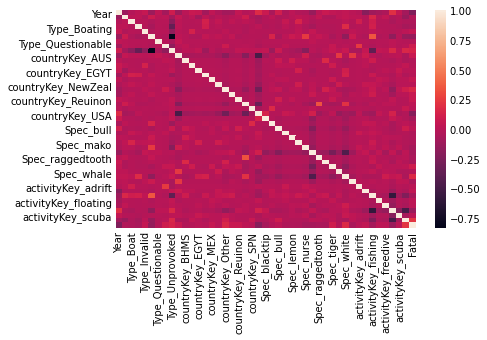

In [100]:
print(df3.corr())
sns.heatmap(df3.corr())

In [101]:
df3['Type_Questionable'].value_counts()

0    2440
1       2
Name: Type_Questionable, dtype: int64

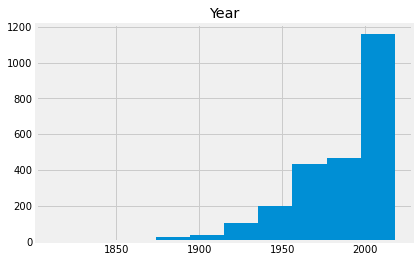

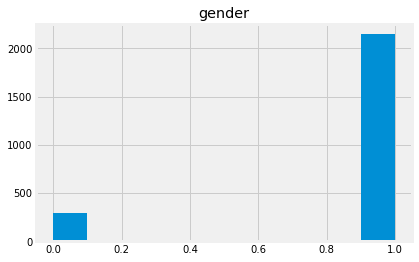

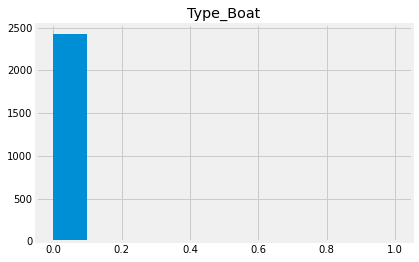

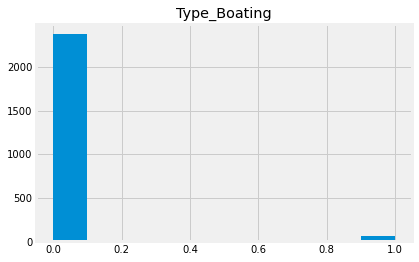

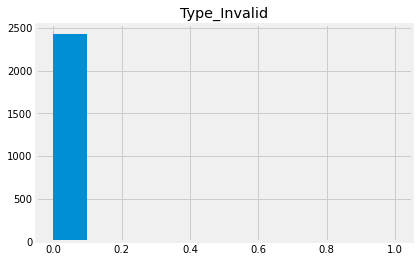

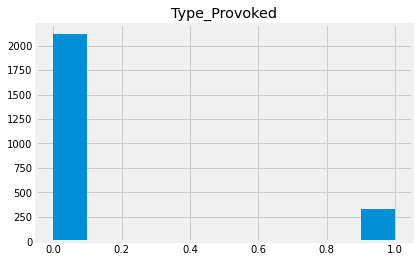

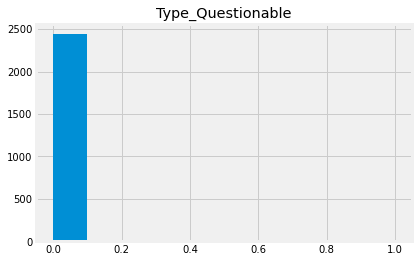

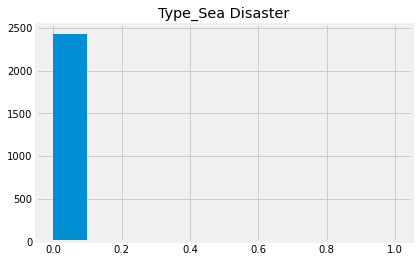

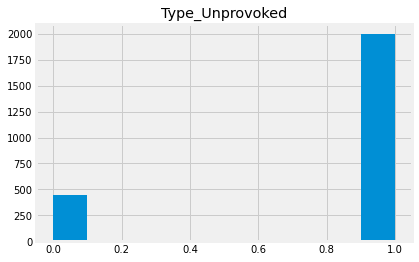

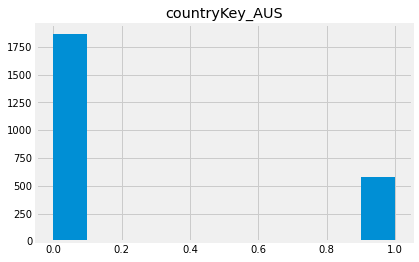

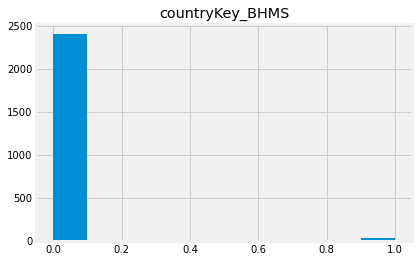

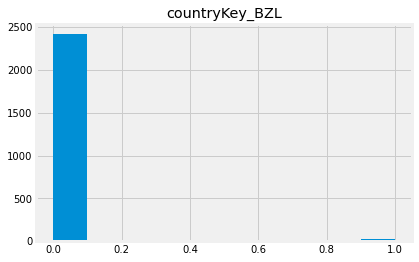

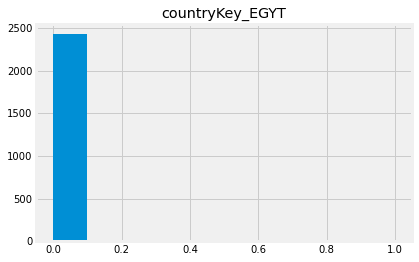

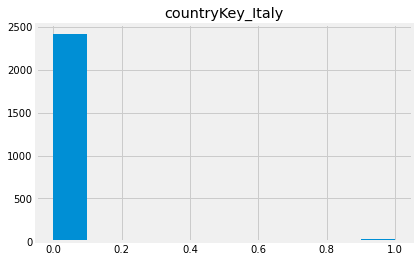

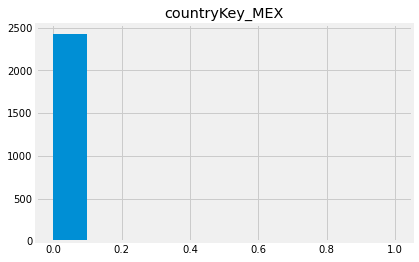

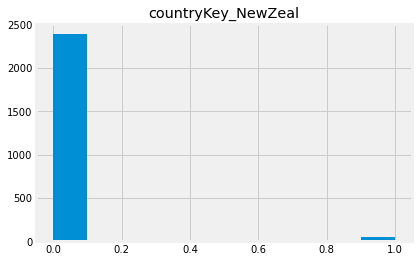

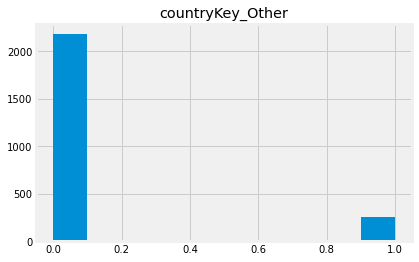

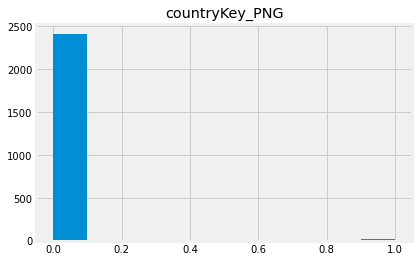

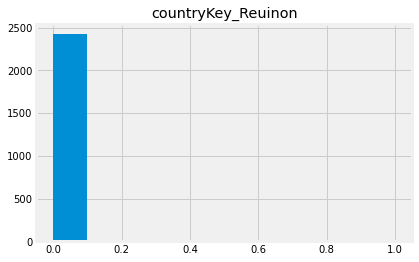

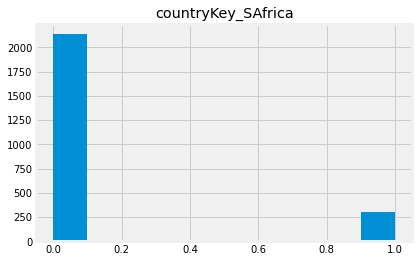

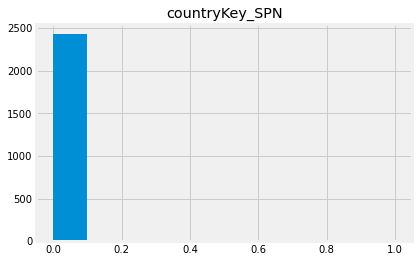

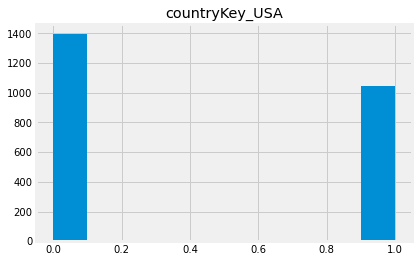

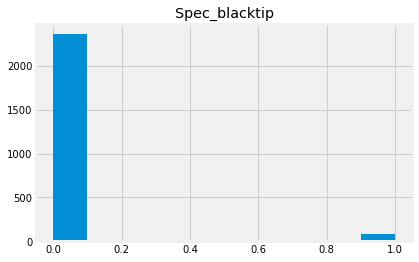

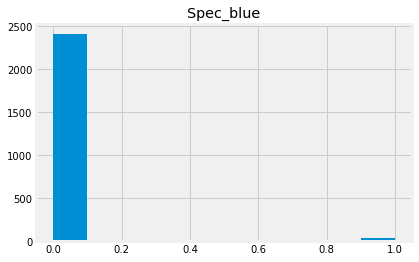

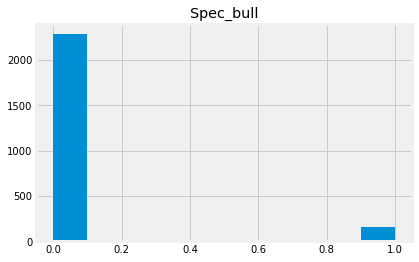

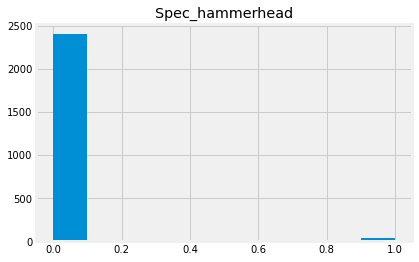

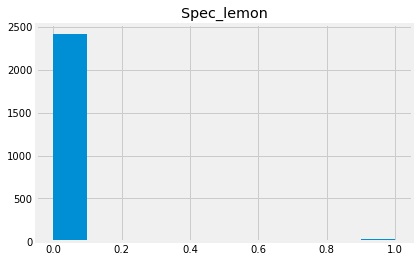

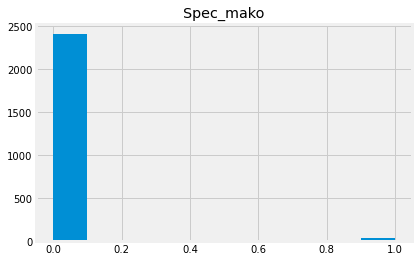

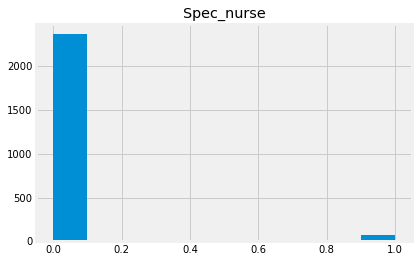

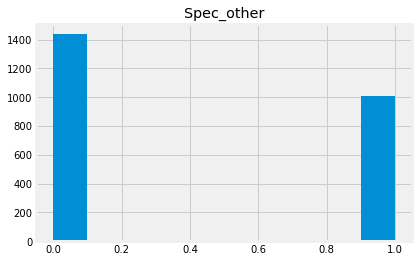

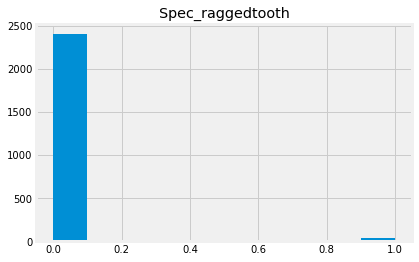

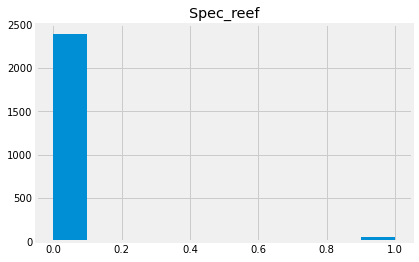

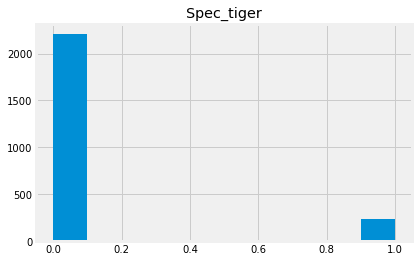

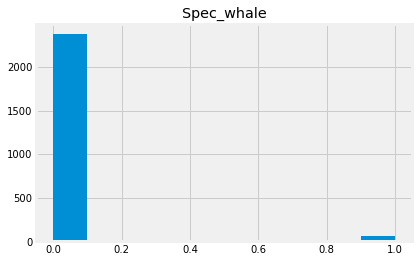

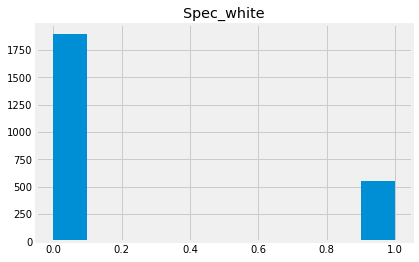

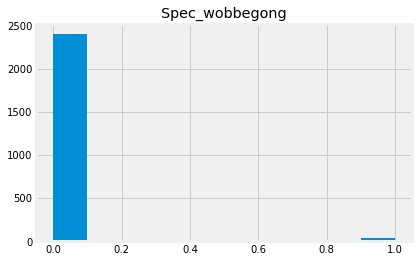

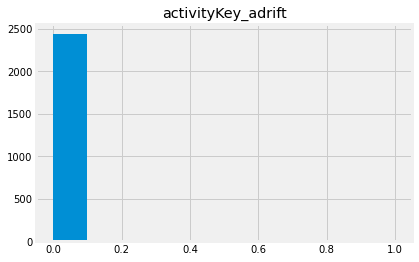

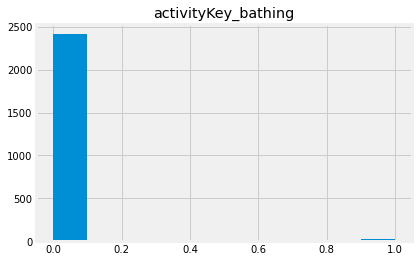

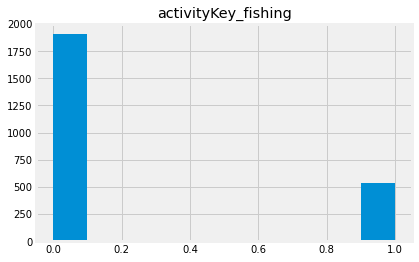

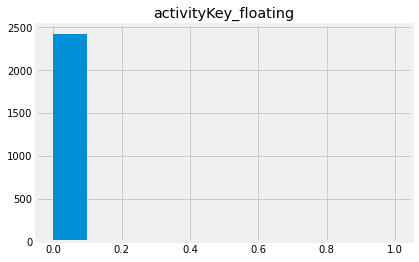

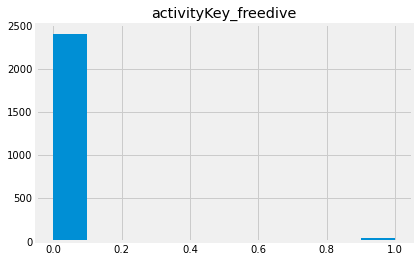

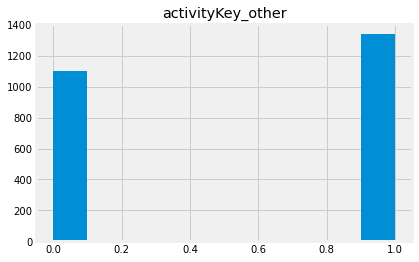

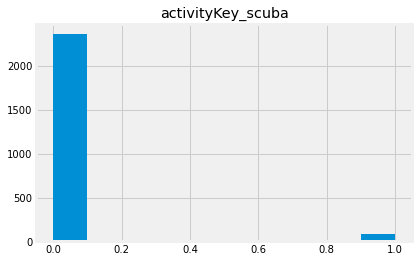

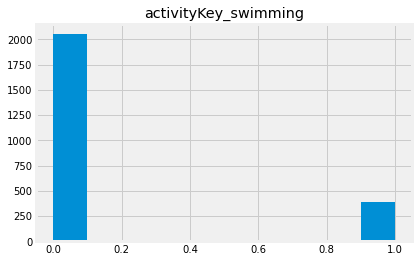

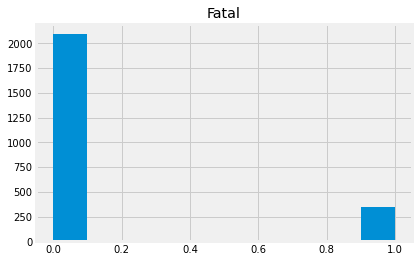

In [102]:
for i in df3.columns:
    plt.hist(df3[i])
    plt.title(i)
    plt.show()

In [103]:
dfcor = df3.corr()

In [104]:
dfcor.head()

Year    gender  Type_Boat  Type_Boating  Type_Invalid  \
Year          1.000000 -0.122336  -0.016475      0.023721      0.059166   
gender       -0.122336  1.000000   0.019657      0.022860     -0.032344   
Type_Boat    -0.016475  0.019657   1.000000     -0.015145     -0.007380   
Type_Boating  0.023721  0.022860  -0.015145      1.000000     -0.013535   
Type_Invalid  0.059166 -0.032344  -0.007380     -0.013535      1.000000   

              Type_Provoked  Type_Questionable  Type_Sea Disaster  \
Year              -0.115383           0.030895          -0.082362   
gender             0.086016           0.010592           0.014448   
Type_Boat         -0.035668          -0.002602          -0.007380   
Type_Boating      -0.065418          -0.004772          -0.013535   
Type_Invalid      -0.031876          -0.002325          -0.006595   

              Type_Unprovoked  countryKey_AUS  countryKey_BHMS  \
Year                 0.098012       -0.118011         0.010659   
gender              -0.086945        0.052067        -0.028490   
Type_Boat           -0.192239        0.013535        -0.012021   
Type_Boating        -0.352583        0.014130        -0.022048   
Type_Invalid        -0.171802        0.002543        -0.010743   

              countryKey_BZL  countryKey_EGYT  countryKey_Italy  \
Year                0.072078         0.063202         -0.087875   
gender              0.016205        -0.090102          0.025125   
Type_Boat          -0.009787        -0.007608          0.126170   
Type_Boating       -0.017950        -0.013955          0.108483   
Type_Invalid        0.134279        -0.006800         -0.008259   

              countryKey_MEX  countryKey_NewZeal  countryKey_Other  \
Year                0.030805           -0.037370         -0.093132   
gender             -0.038849            0.004289         -0.022716   
Type_Boat          -0.008047            0.048131         -0.016729   
Type_Boating       -0.014759            0.009282         -0.016789   
Type_Invalid       -0.007191           -0.012212          0.021191   

              countryKey_PNG  countryKey_Reuinon  countryKey_SAfrica  \
Year               -0.085755            0.045304           -0.018596   
gender             -0.001631            0.017169            0.098218   
Type_Boat           0.029483           -0.007831            0.020502   
Type_Boating       -0.019205           -0.014362           -0.032572   
Type_Invalid       -0.009358           -0.006998           -0.030738   

              countryKey_SPN  countryKey_USA  Spec_blacktip  Spec_blue  \
Year                0.001864        0.178092       0.082187  -0.058562   
gender             -0.038577       -0.073292      -0.017702   0.022482   
Type_Boat          -0.006900       -0.051252      -0.016615  -0.010798   
Type_Boating       -0.012656        0.018753      -0.030474  -0.019804   
Type_Invalid       -0.006167       -0.008886      -0.014849  -0.009650   

              Spec_bull  Spec_hammerhead  Spec_lemon  Spec_mako  Spec_nurse  \
Year           0.107715        -0.039986    0.018142  -0.027018   -0.033892   
gender        -0.039347        -0.024656    0.004385   0.033221    0.008333   
Type_Boat     -0.024062         0.061995   -0.009787   0.144311    0.009879   
Type_Boating  -0.033926         0.019851   -0.017950   0.023299   -0.029871   
Type_Invalid  -0.021504        -0.010210   -0.008746   0.033668   -0.014555   

              Spec_other  Spec_raggedtooth  Spec_reef  Spec_tiger  Spec_whale  \
Year           -0.139960          0.018237   0.074123    0.041651    0.020872   
gender         -0.015355          0.048345  -0.039891   -0.040831    0.022860   
Type_Boat      -0.029831         -0.011875  -0.013535   -0.014345   -0.015145   
Type_Boating   -0.077804         -0.021779  -0.024824   -0.028874   -0.012205   
Type_Invalid    0.055853         -0.010612  -0.012096   -0.026562   -0.013535   

              Spec_white  Spec_wobbegong  activityKey_adrift  \
Year            0.039259   

In [105]:
dfcor.columns.values

array(['Year', 'gender', 'Type_Boat', 'Type_Boating', 'Type_Invalid',
       'Type_Provoked', 'Type_Questionable', 'Type_Sea Disaster',
       'Type_Unprovoked', 'countryKey_AUS', 'countryKey_BHMS',
       'countryKey_BZL', 'countryKey_EGYT', 'countryKey_Italy',
       'countryKey_MEX', 'countryKey_NewZeal', 'countryKey_Other',
       'countryKey_PNG', 'countryKey_Reuinon', 'countryKey_SAfrica',
       'countryKey_SPN', 'countryKey_USA', 'Spec_blacktip', 'Spec_blue',
       'Spec_bull', 'Spec_hammerhead', 'Spec_lemon', 'Spec_mako',
       'Spec_nurse', 'Spec_other', 'Spec_raggedtooth', 'Spec_reef',
       'Spec_tiger', 'Spec_whale', 'Spec_white', 'Spec_wobbegong',
       'activityKey_adrift', 'activityKey_bathing', 'activityKey_fishing',
       'activityKey_floating', 'activityKey_freedive',
       'activityKey_other', 'activityKey_scuba', 'activityKey_swimming',
       'Fatal'], dtype=object)

In [106]:
for x in dfcor.columns.values:
    dfcor.sort_values(by=[x], inplace = True)
    print(x)
    print('')
    print(dfcor[x])
    print('END')
    print('')

Year

Fatal                  -0.237462
activityKey_bathing    -0.204623
Spec_other             -0.139960
gender                 -0.122336
countryKey_AUS         -0.118011
Type_Provoked          -0.115383
activityKey_fishing    -0.106646
countryKey_Other       -0.093132
countryKey_Italy       -0.087875
countryKey_PNG         -0.085755
activityKey_swimming   -0.082502
Type_Sea Disaster      -0.082362
activityKey_floating   -0.074056
Spec_blue              -0.058562
activityKey_freedive   -0.047225
Spec_hammerhead        -0.039986
countryKey_NewZeal     -0.037370
Spec_nurse             -0.033892
Spec_mako              -0.027018
countryKey_SAfrica     -0.018596
Type_Boat              -0.016475
activityKey_adrift     -0.014394
countryKey_SPN          0.001864
Spec_wobbegong          0.010513
countryKey_BHMS         0.010659
Spec_lemon              0.018142
Spec_raggedtooth        0.018237
Spec_whale              0.020872
Type_Boating            0.023721
countryKey_MEX          0.030805
Type

In [107]:
dfcor.sort_values(by=['Type_Provoked'], inplace = True)

In [108]:
print(dfcor)

                          Year    gender  Type_Boat  Type_Boating  \
Type_Unprovoked       0.098012 -0.086945  -0.192239     -0.352583   
Spec_white            0.039259  0.048187   0.027357      0.182735   
activityKey_other     0.206263 -0.039634  -0.054552     -0.021396   
Fatal                -0.237462 -0.024644  -0.037169     -0.060965   
activityKey_swimming -0.082502 -0.130144  -0.039677     -0.072770   
Year                  1.000000 -0.122336  -0.016475      0.023721   
Type_Boating          0.023721  0.022860  -0.015145      1.000000   
Spec_bull             0.107715 -0.039347  -0.024062     -0.033926   
Spec_tiger            0.041651 -0.040831  -0.014345     -0.028874   
activityKey_bathing  -0.204623 -0.017525  -0.009962     -0.018271   
activityKey_floating -0.074056 -0.006429  -0.008463     -0.015522   
Type_Boat            -0.016475  0.019657   1.000000     -0.015145   
countryKey_Reuinon    0.045304  0.017169  -0.007831     -0.014362   
countryKey_EGYT       0.063202 -0.

                          Year    gender  Type_Boat  Type_Boating  \
Year                  1.000000 -0.122336  -0.016475      0.023721   
gender               -0.122336  1.000000   0.019657      0.022860   
Type_Boat            -0.016475  0.019657   1.000000     -0.015145   
Type_Boating          0.023721  0.022860  -0.015145      1.000000   
Type_Invalid          0.059166 -0.032344  -0.007380     -0.013535   
Type_Provoked        -0.115383  0.086016  -0.035668     -0.065418   
Type_Questionable     0.030895  0.010592  -0.002602     -0.004772   
Type_Sea Disaster    -0.082362  0.014448  -0.007380     -0.013535   
Type_Unprovoked       0.098012 -0.086945  -0.192239     -0.352583   
countryKey_AUS       -0.118011  0.052067   0.013535      0.014130   
countryKey_BHMS       0.010659 -0.028490  -0.012021     -0.022048   
countryKey_BZL        0.072078  0.016205  -0.009787     -0.017950   
countryKey_EGYT       0.063202 -0.090102  -0.007608     -0.013955   
countryKey_Italy     -0.087875  0.

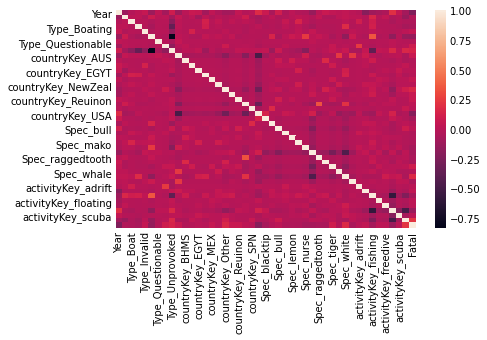

In [109]:
print(df3.corr())
sns.heatmap(df3.corr())

In [110]:
df3.describe()

Year       gender    Type_Boat  Type_Boating  Type_Invalid  \
count  2442.000000  2442.000000  2442.000000   2442.000000   2442.000000   
mean   1984.524161     0.879607     0.008190      0.027027      0.006552   
std      31.028360     0.325487     0.090146      0.162195      0.080695   
min    1812.000000     0.000000     0.000000      0.000000      0.000000   
25%    1964.000000     1.000000     0.000000      0.000000      0.000000   
50%    1995.000000     1.000000     0.000000      0.000000      0.000000   
75%    2008.000000     1.000000     0.000000      0.000000      0.000000   
max    2018.000000     1.000000     1.000000      1.000000      1.000000   

       Type_Provoked  Type_Questionable  Type_Sea Disaster  Type_Unprovoked  \
count    2442.000000        2442.000000        2442.000000      2442.000000   
mean        0.133497           0.000819           0.006552         0.817363   
std         0.340181           0.028612           0.080695         0.386448   
min         0.000000           0.000000           0.000000         0.000000   
25%         0.000000           0.000000           0.000000         1.000000   
50%         0.000000           0.000000           0.000000         1.000000   
75%         0.000000           0.000000           0.000000         1.000000   
max         1.000000           1.000000           1.000000         1.000000   

       countryKey_AUS  countryKey_BHMS  countryKey_BZL  countryKey_EGYT  \
count     2442.000000      2442.000000     2442.000000      2442.000000   
mean         0.236691         0.017199        0.011466         0.006962   
std          0.425138         0.130039        0.106486         0.083162   
min          0.000000         0.000000        0.000000         0.000000   
25%          0.000000         0.000000        0.000000         0.000000   
50%          0.000000         0.000000        0.000000         0.000000   
75%          0.000000         0.000000        0.000000         0.000000   
max          1.000000         1.000000        1.000000         1.000000   

       countryKey_Italy  countryKey_MEX  countryKey_NewZeal  countryKey_Other  \
count       2442.000000     2442.000000         2442.000000       2442.000000   
mean           0.010238        0.007781            0.022113          0.106880   
std            0.100682        0.087881            0.147081          0.309023   
min            0.000000        0.000000            0.000000          0.000000   
25%            0.000000        0.000000            0.000000          0.000000   
50%            0.000000        0.000000            0.000000          0.000000   
75%            0.000000        0.000000            0.000000          0.000000   
max            1.000000        1.000000            1.000000          1.000000   

       countryKey_PNG  countryKey_Reuinon  countryKey_SAfrica  countryKey_SPN  \
count     2442.000000         2442.000000         2442.000000     2442.000000   
mean         0.013104            0.007371            0.125307        0.005733   
std          0.113744            0.085555            0.331135        0.075515   
min          0.000000            0.000000            0.000000        0.000000   
25%          0.000000            0.000000            0.000000        0.000000   
50%          0.000000            0.000000            0.000000        0.000000   
75%          0.000000            0.000000            0.000000        0.000000   
max          1.000000            1.000000            1.000000        1.000000   

       countryKey_USA  Spec_blacktip    Spec_blue    Spec_bull  \
count     2442.000000    2442.000000  2442.000000  2442.000000   
mean         0.429156       0.032351     0.013923     0.065520   
std          0.495057       0.176966     0.117196     0.247492   
min          0.000000       0.000000     0.000000     0.000000   
25%          0.000000       0.000000     0.000000     0.000000   
50%          0.000000       0.000000     0.000000     0.000000   
75%          1.0000

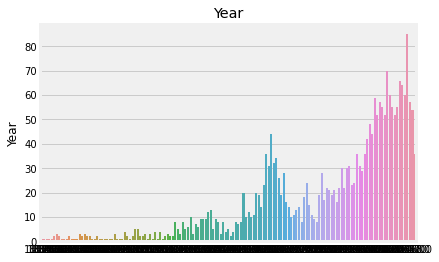

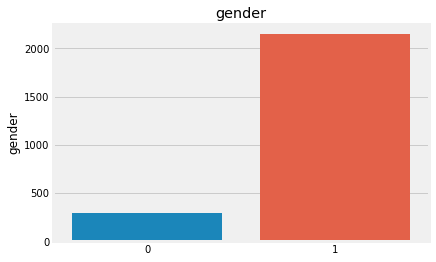

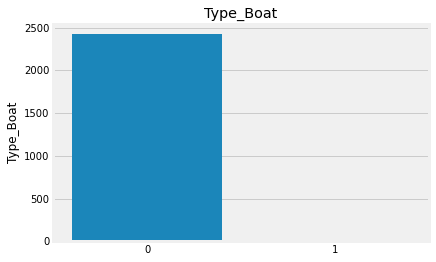

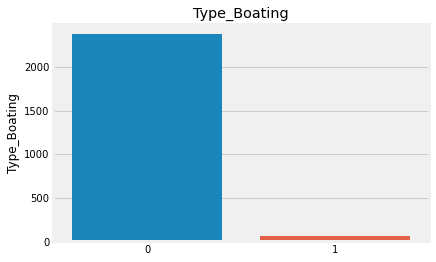

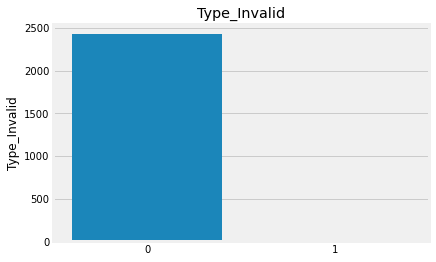

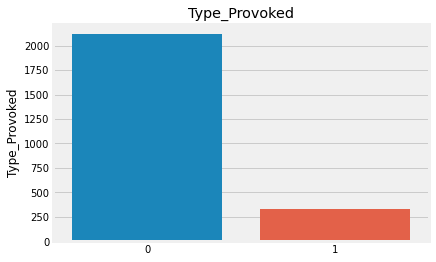

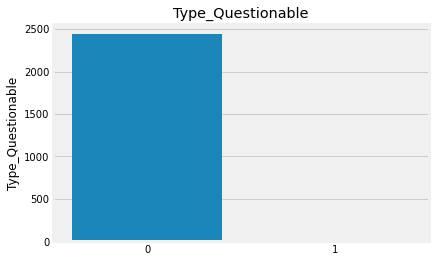

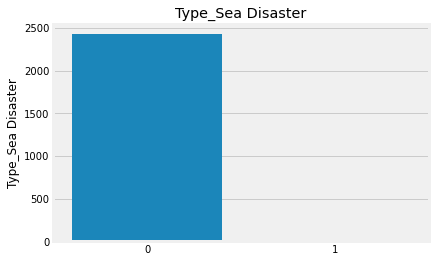

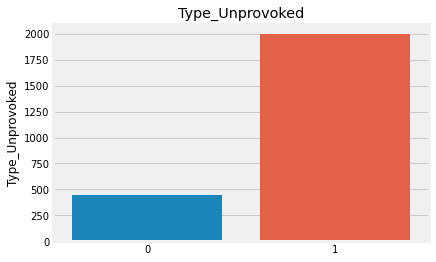

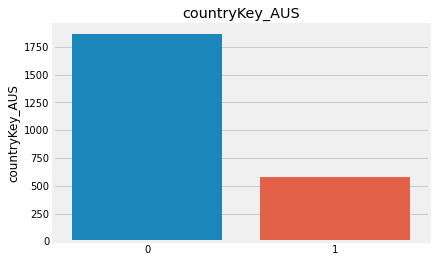

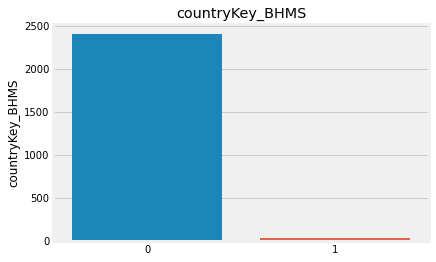

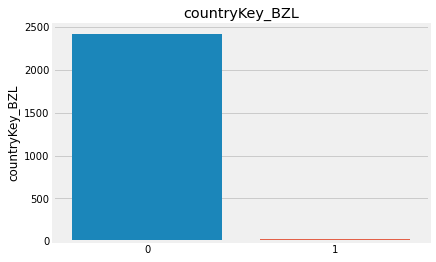

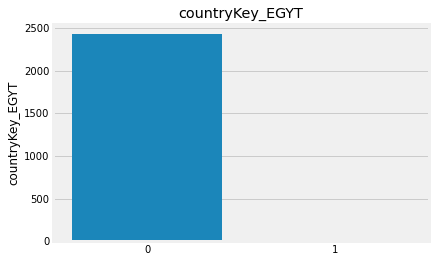

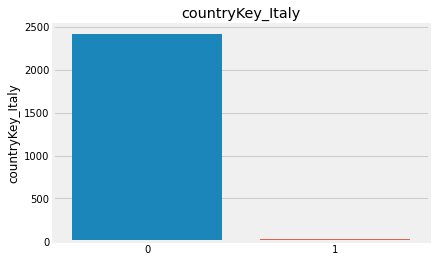

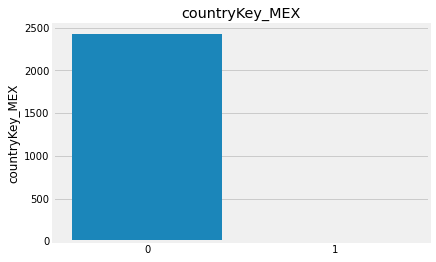

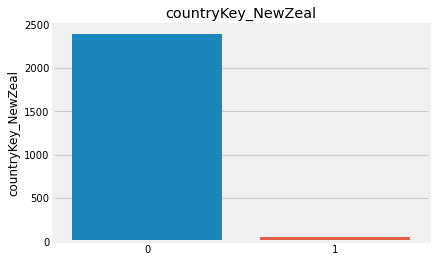

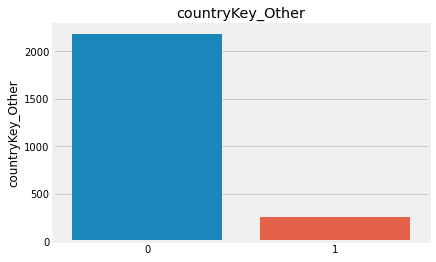

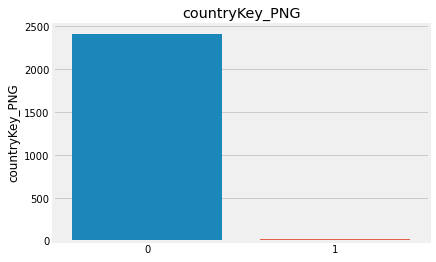

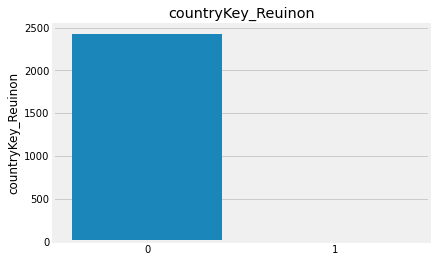

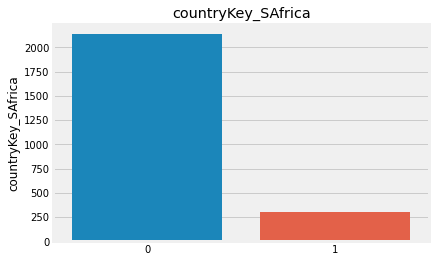

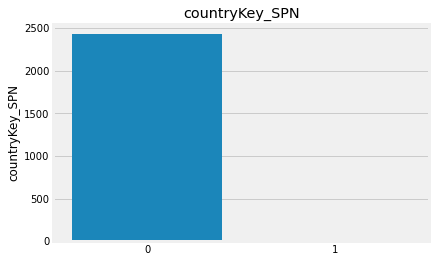

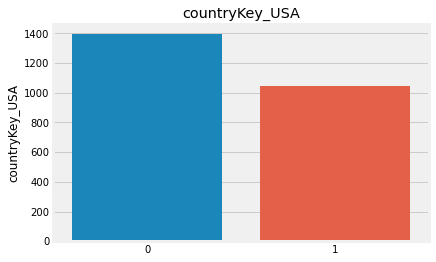

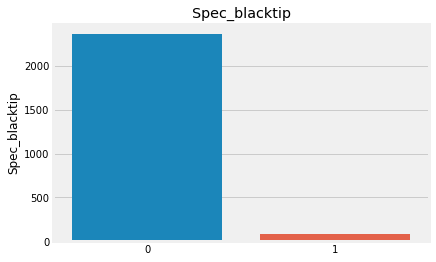

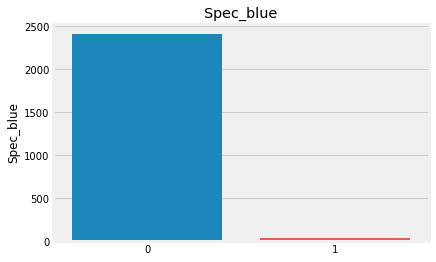

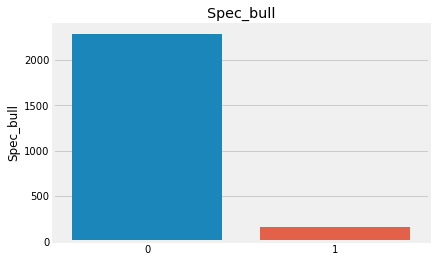

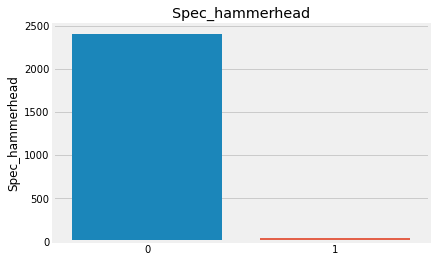

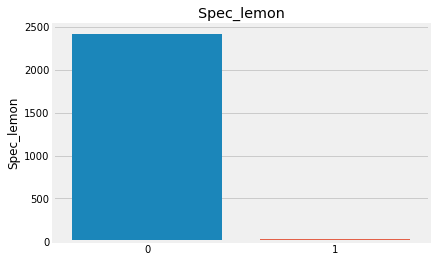

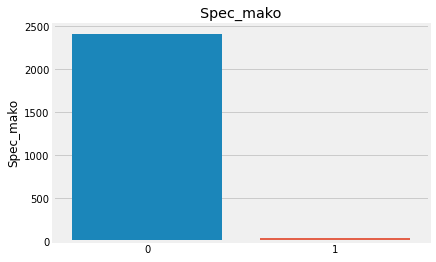

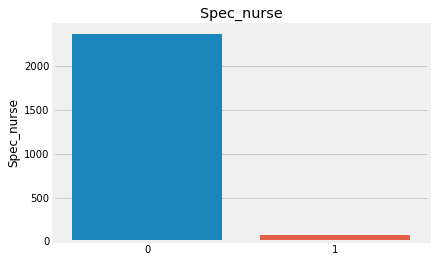

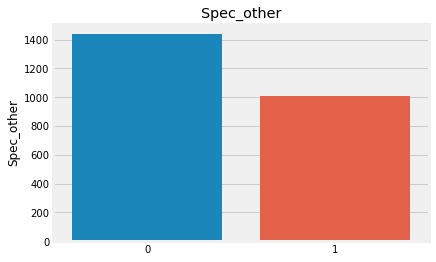

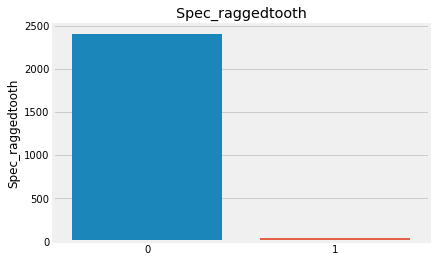

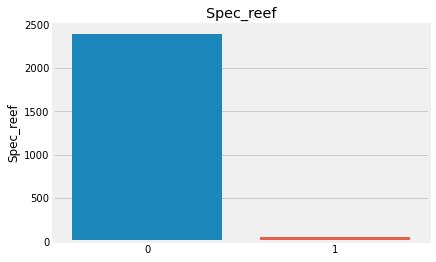

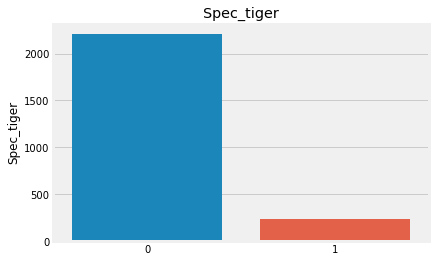

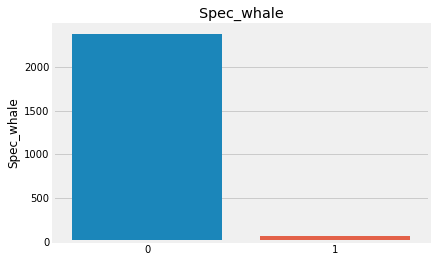

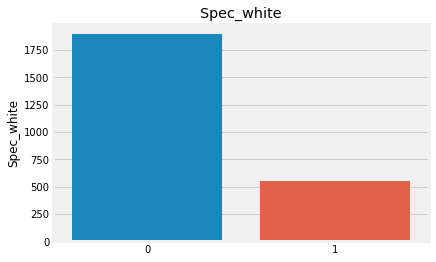

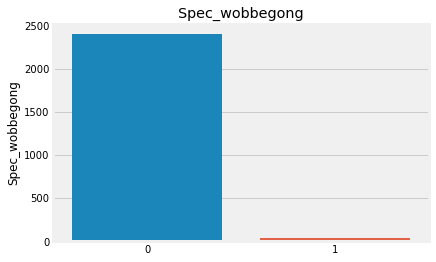

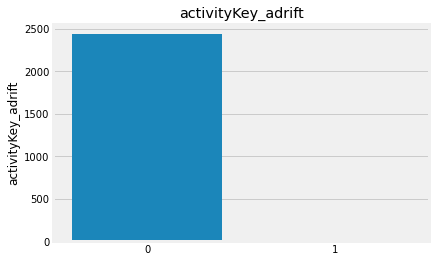

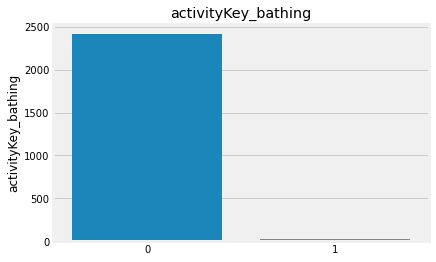

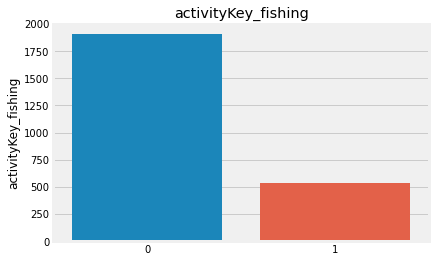

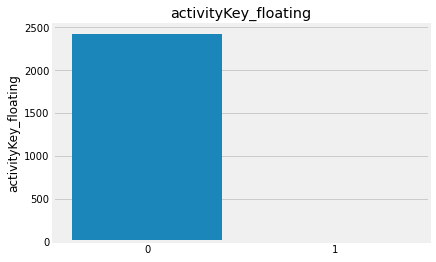

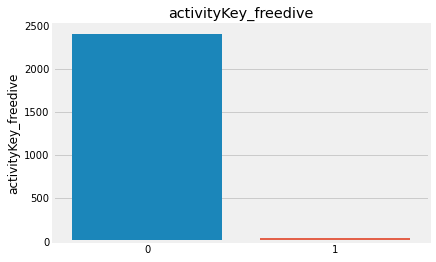

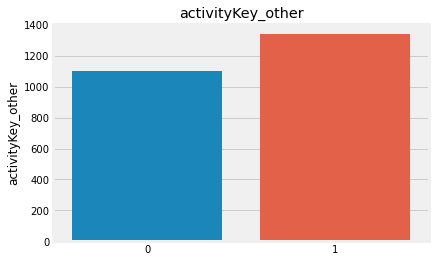

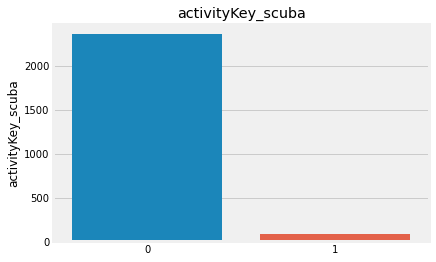

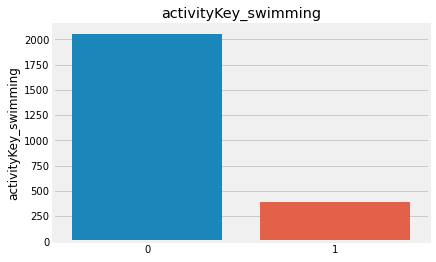

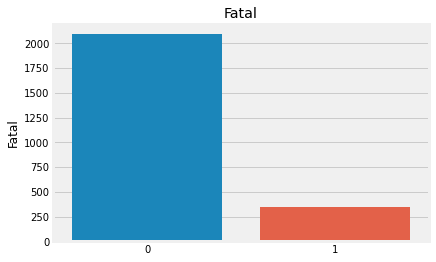

In [111]:
for i in df3.columns:
    sns.barplot(df3[i].value_counts().index, df3[i].value_counts()).set_title(i)
    plt.show()